# Part I


## Phase 1:


In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

from sklearn.preprocessing import OneHotEncoder

### Exploratory Data Analysis:

In [177]:
df = pd.read_csv('Spaceship data.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Missing values**

In [179]:
def print_nulls_info(data = df, exlude_zero = False):
    table = PrettyTable()
    if exlude_zero:
        data = data.loc[:, data.isna().sum() > 0]

    table.field_names = ['Column Name', 'Data Type', 'Null Count', 'Null Percentage']
    for column in data.columns:
        data_type = str(data[column].dtype)
        null_count = data[column].isna().sum()
        null_percentage = (null_count / len(data)) * 100
        table.add_row([column, data_type, null_count, f"{null_percentage:.2f}%"])
    print(table)

print_nulls_info()

+--------------+-----------+------------+-----------------+
| Column Name  | Data Type | Null Count | Null Percentage |
+--------------+-----------+------------+-----------------+
| PassengerId  |   object  |     0      |      0.00%      |
|  HomePlanet  |   object  |    201     |      2.31%      |
|  CryoSleep   |   object  |    217     |      2.50%      |
|    Cabin     |   object  |    199     |      2.29%      |
| Destination  |   object  |    182     |      2.09%      |
|     Age      |  float64  |    179     |      2.06%      |
|     VIP      |   object  |    203     |      2.34%      |
| RoomService  |  float64  |    181     |      2.08%      |
|  FoodCourt   |  float64  |    183     |      2.11%      |
| ShoppingMall |  float64  |    208     |      2.39%      |
|     Spa      |  float64  |    183     |      2.11%      |
|    VRDeck    |  float64  |    188     |      2.16%      |
|     Name     |   object  |    200     |      2.30%      |
| Transported  |    bool   |     0      

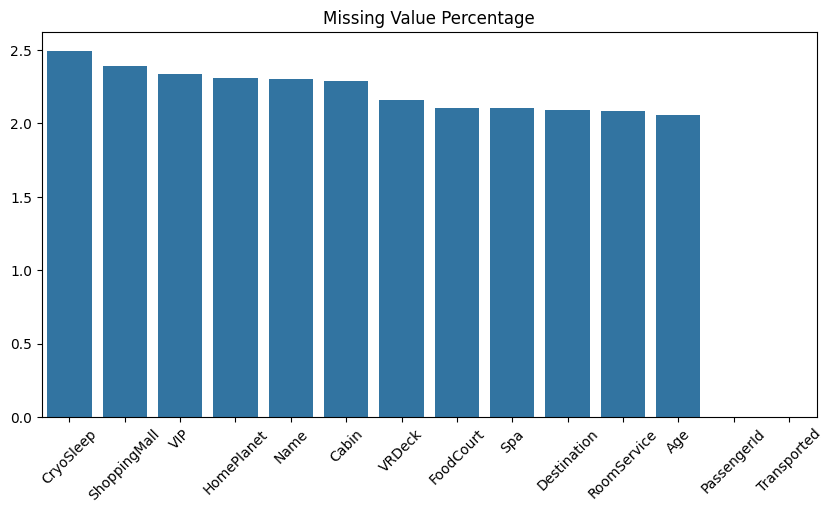

In [180]:
# Missing value visualization
missing = df.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values*100)
plt.xticks(rotation=45)
plt.title("Missing Value Percentage")
plt.xlabel("")
plt.show()

We can see that almost every feature has missing values.

This plot  measures:
- Each bar shows the precentage of missing values (NaN) in that column.
- This is not enough by itself to decide how to impute, but it tells us we must define a missing-value strategy, and that the strategy may need to be different per feature.

**Data types**

In [181]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [182]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

There are 6 continuous features, 4 categorical features (excluding the target) and 3 descriptive/qualitative features.

We will need to transform the categorical and descriptive features to numeric so we can train the classifiers.

Assumption being made:
- The models we plan to use (from scikit-learn) expect numeric inputs.
- For categorical columns we will use one-hot encoding (or an equivalent encoding) so the model does not assume an artificial order between categories.

#### Target Analysis:

***AI used [1]***

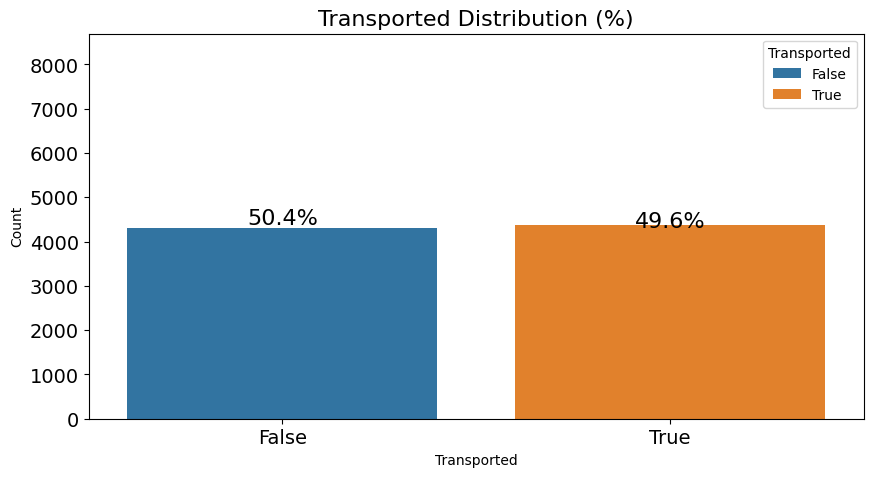

In [183]:

# Counts and proportions
counts = df['Transported'].value_counts()
proportions = df['Transported'].value_counts(normalize=True)

proportions_str = [f'{p:.1%}' for p in proportions]

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(x='Transported', data=df, hue='Transported')
plt.title('Transported Distribution (%)', fontsize=16)
plt.xlabel('Transported')
plt.ylabel('Count')

plt.ylim(0, len(df))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Annotate percentages
for i, count in enumerate(counts):
    plt.text(i, count, proportions_str[i], ha='center', fontsize=16)

plt.show()


The **`Transported`** column is the label we want to predict.

Class balance check:
- We use a count plot of `Transported` to verify that the dataset is roughly balanced.
- This matters because accuracy alone can be misleading when classes are imbalanced (a classifier could predict the majority class and still get a high accuracy).

***



#### Feature Analysis:

**Continuous features**

Text(0.5, 0, 'Age (years)')

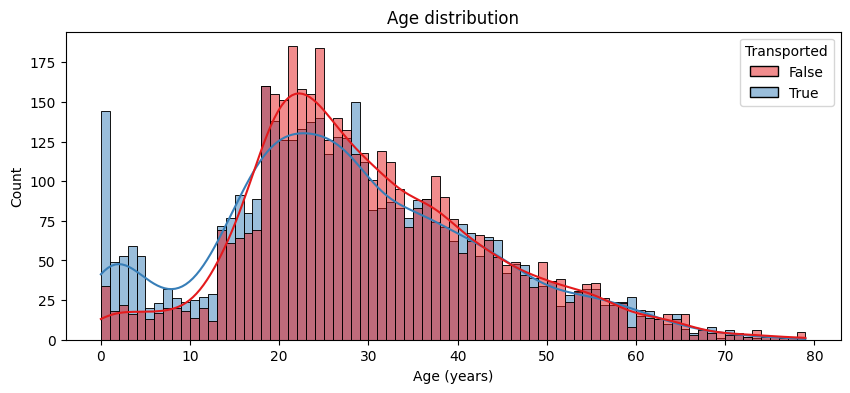

In [184]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=df, x='Age', hue='Transported', binwidth=1, kde=True, palette="Set1")

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

We noticed theres a separation between ages.
* 0-18 years-olds were more likely to be transported
* 18-40 were less likely to be transported.
* 40+ were equally likely to be transported.

We will probably create age group feature later because of those insights. 

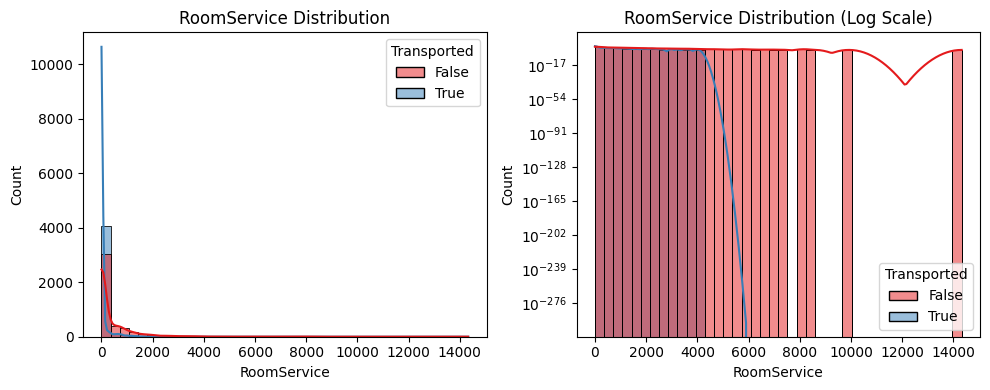

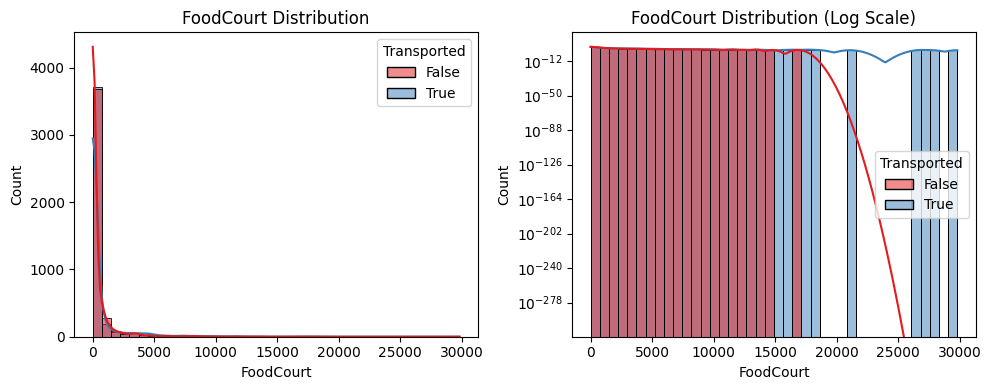

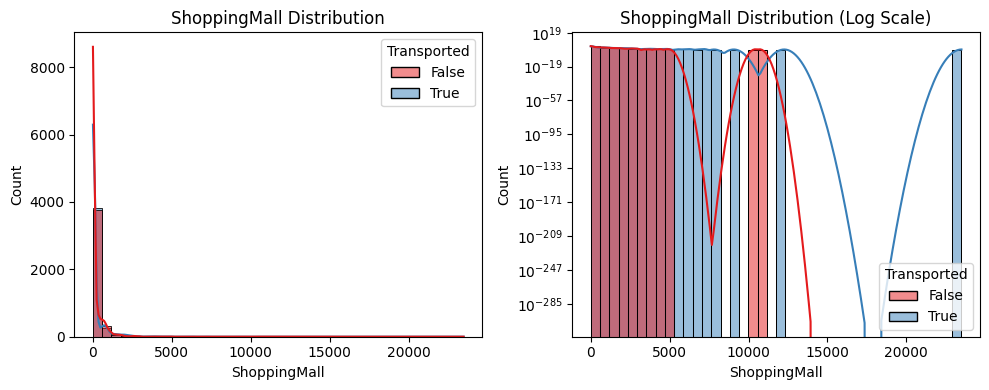

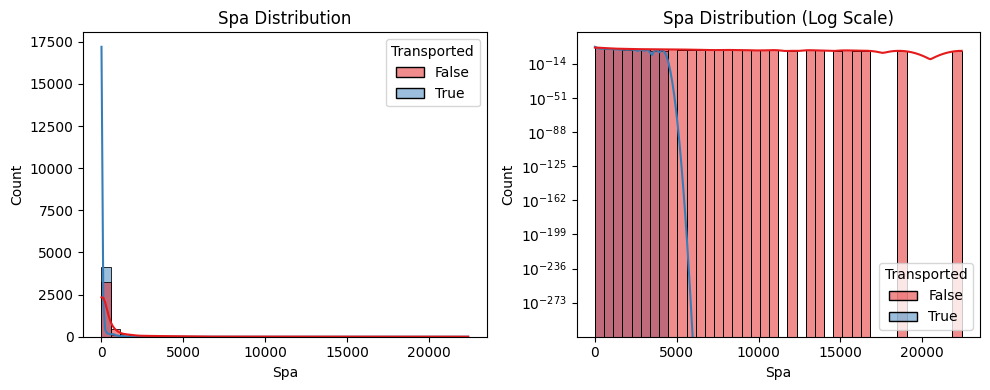

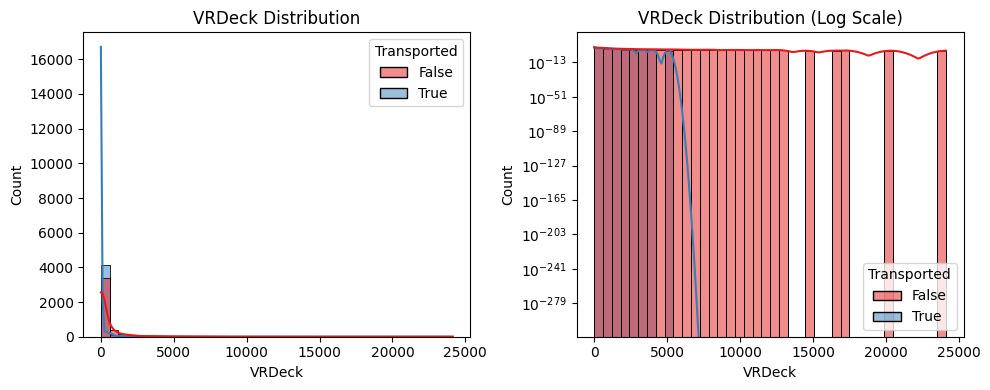

In [185]:
continuous_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in continuous_cols:
    if col == "Age":
        continue

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(col + " Distribution")
    sns.histplot(
        df,
        x=col,
        hue="Transported",
        bins=40,
        kde=True,
        palette="Set1"
    )
    plt.tight_layout()
    
    plt.subplot(1, 2, 2)
    plt.title(col + " Distribution (Log Scale)")
    sns.histplot(
        df,
        x=col,
        hue="Transported",
        bins=40,
        kde=True,
        palette="Set1"
    )
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

Notes about the spending distributions (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck):

- The y-axis is limited to zoom in, because the distributions are highly skewed.
- The plots show a heavy concentration at 0 (most passengers did not spend on that service).
- A small number of passengers have very large values (outliers). This implies:
  - Mean-based imputation can be biased upward.
  - Median (or a dedicated "missing vs zero" indicator) might safer than mean, unless we verify otherwise with experiments.

In [186]:
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df[~(df[spending_cols].isna().any(axis=1)) & (df[spending_cols].sum(axis=1) == 0)].shape

(3247, 14)

3247 passengers didnt spend money at all,we will later create boolean var of NoSpending, to tell if passenger spent money or not.

**Categorical Analysis**

In [187]:
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
cat_features

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

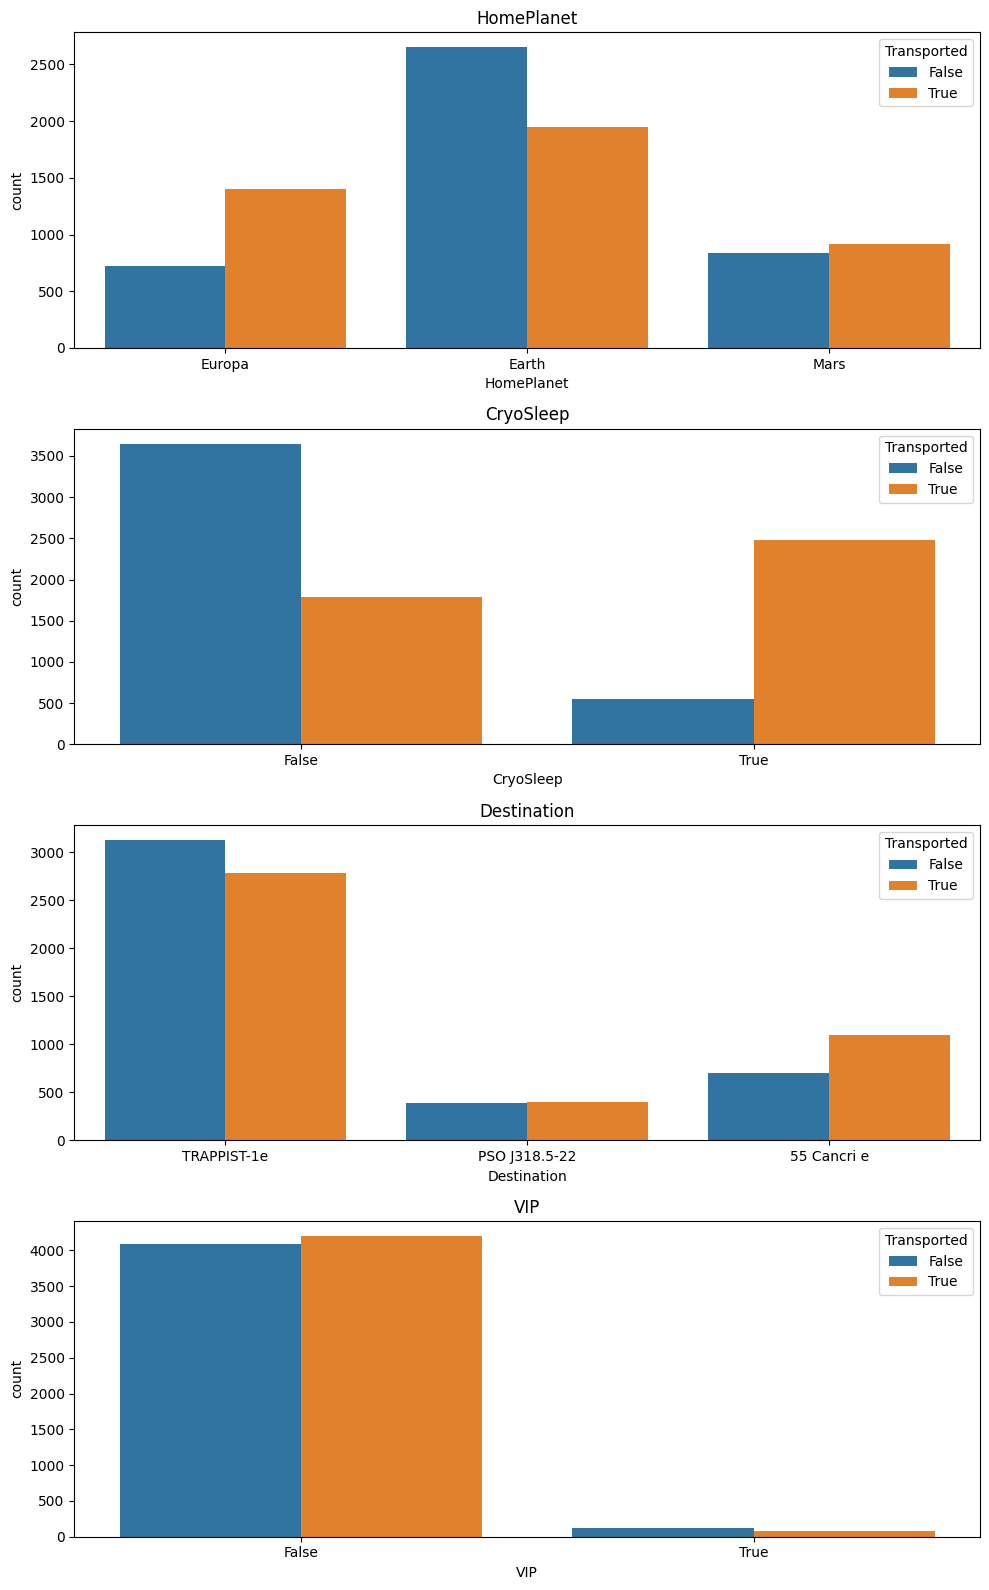

In [188]:
target = 'Transported'

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_features):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

Consider drop the VIP feature because it doesn't help to predict Transported/not.

The analysis indicates that CryoSleep is strongly associated with the target variable, while HomePlanet and Destination show moderate effects.


***

## Phase 2:


**Train Test Split**

We used an 80/20 train-test split to ensure sufficient training data while keeping an independent test set for final evaluation.

In [189]:
df_raw = df.copy() # Keep a copy of the original dataframe for reference

X_train, X_test = train_test_split(df_raw, test_size=0.2, random_state=0)


### Data Prepping:

* We want to extract passengers group to learn group sizes.
* We want to extract deck cabin number and side from cabin.
* We want to extract surnames to identify families.

***AI used [2]***

In [190]:
# Extract PassengerGroup from PassengerId
X_train['PassengerGroup'] = X_train['PassengerId'].str.split('_').str[0].astype(int)
X_test['PassengerGroup'] = X_test['PassengerId'].str.split('_').str[0].astype(int)

# Compute group size
group_sizes = X_train['PassengerGroup'].value_counts()
X_train['GroupSize'] = X_train['PassengerGroup'].map(group_sizes)
X_test['GroupSize'] = X_test['PassengerGroup'].map(group_sizes)

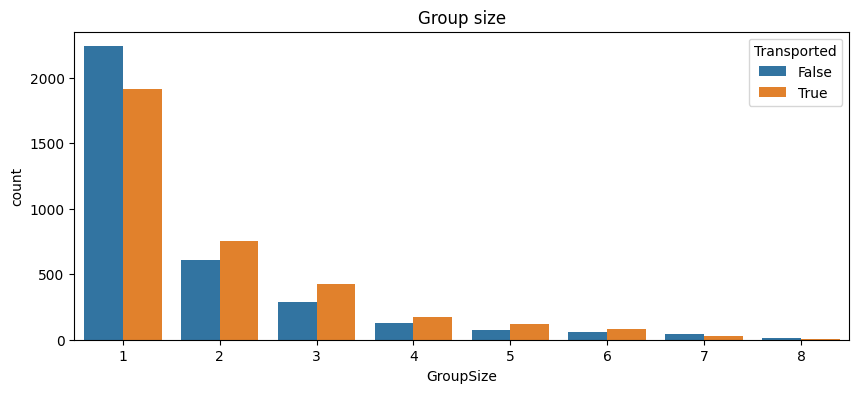

In [191]:
plt.figure(figsize=(10,4))
sns.countplot(data=X_train, x='GroupSize', hue='Transported')
plt.title('Group size')
plt.show()

Theres separation between solo passengers and groups. Solo passengers are less likely to be transported then groups.

We will create binary feature Solo, to track which passenger is traveling solo.

In [192]:
X_train['Solo'] = X_train['GroupSize'] == 1
X_test['Solo'] = X_test['GroupSize'] == 1

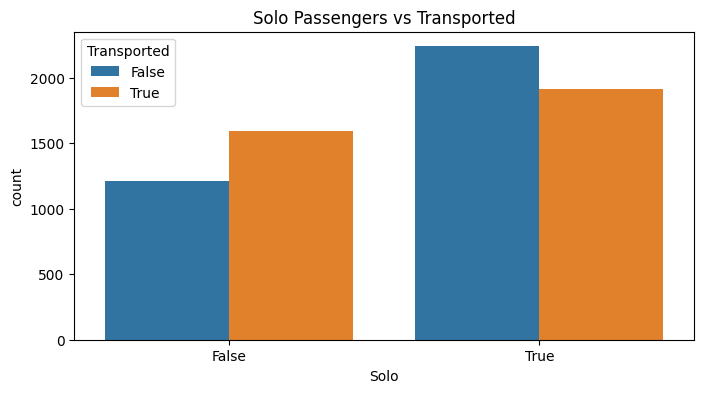

In [193]:
# Solos vs Transported
plt.figure(figsize=(8,4))
sns.countplot(data=X_train, x='Solo', hue='Transported')
plt.title('Solo Passengers vs Transported')
plt.show()

**Spendings**

Creating TotalSpent and NoSpendings features.

In [194]:
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Sum spendings 
X_train['TotalSpent'] = X_train[spending_cols].sum(axis=1)
X_test['TotalSpent'] = X_test[spending_cols].sum(axis=1)

# NoSpendings column
X_train['NoSpendings'] = (X_train['TotalSpent'] == 0).astype(int)
X_test['NoSpendings'] = (X_test['TotalSpent'] == 0).astype(int)

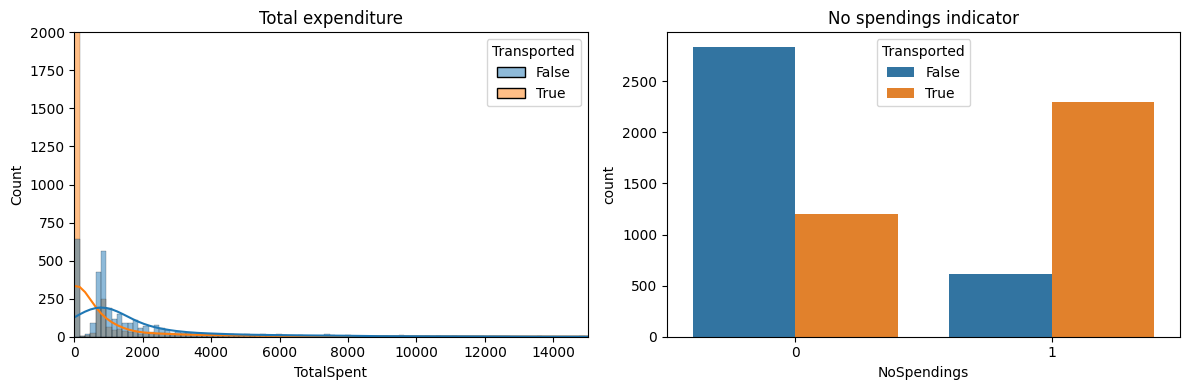

In [195]:
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=X_train, x='TotalSpent', hue='Transported', bins=200, kde=True)
plt.title('Total expenditure')
plt.ylim([0,2000])
plt.xlim([0,15000])

plt.subplot(1,2,2)
sns.countplot(data=X_train, x='NoSpendings', hue='Transported')
plt.title('No spendings indicator')
fig.tight_layout()

Now it's very clear - passengers who didn't spent money were more likely to be transported.

**Age Groups**

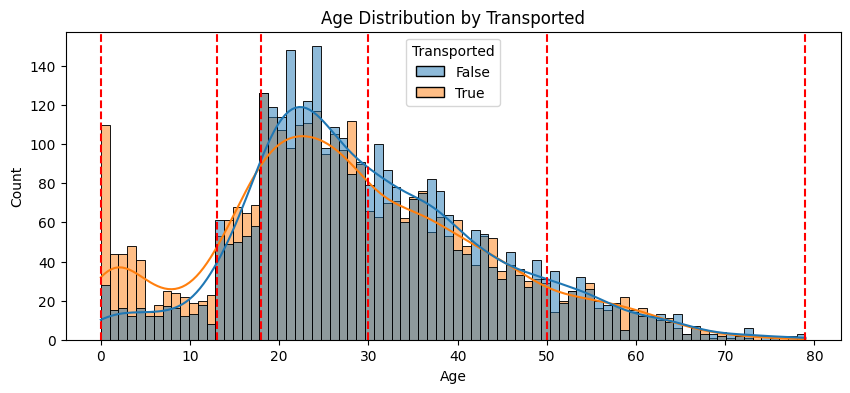

In [196]:
# Plot distribution of new features 
plt.figure(figsize=(10,4)) 
sns.histplot(data=X_train, x='Age', hue='Transported',kde=True, bins=80) 
plt.title('Age Distribution by Transported')

age_lines = [0, 13, 18, 30, 50, X_train['Age'].max()]
for line in age_lines:
    plt.axvline(x=line, color='red', linestyle='--')

plt.show()

We now divide passengers to age groups, this will later help us visualize data and fill in missing features. Later we will drop this column.

In [197]:
# New feature: Age groups
# Train set
X_train['Age_group']=np.nan
X_train.loc[X_train['Age']<=13,'Age_group']='Age_0-13'
X_train.loc[(X_train['Age']>13) & (X_train['Age']<=18),'Age_group']='Age_14-18'
X_train.loc[(X_train['Age']>18) & (X_train['Age']<=30),'Age_group']='Age_19-30'
X_train.loc[(X_train['Age']>30) & (X_train['Age']<=50),'Age_group']='Age_31-50'
X_train.loc[X_train['Age']>50,'Age_group']='Age_51+'

# Test set
X_test['Age_group']=np.nan
X_test.loc[X_test['Age']<=13,'Age_group']='Age_0-13'
X_test.loc[(X_test['Age']>13) & (X_test['Age']<=18),'Age_group']='Age_14-18'
X_test.loc[(X_test['Age']>18) & (X_test['Age']<=30),'Age_group']='Age_19-30'
X_test.loc[(X_test['Age']>30) & (X_test['Age']<=50),'Age_group']='Age_31-50'
X_test.loc[X_test['Age']>50,'Age_group']='Age_51+'

C:\Users\Yuval\AppData\Local\Temp\ipykernel_4912\3808677728.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0-13' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_train.loc[X_train['Age']<=13,'Age_group']='Age_0-13'
C:\Users\Yuval\AppData\Local\Temp\ipykernel_4912\3808677728.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0-13' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_test.loc[X_test['Age']<=13,'Age_group']='Age_0-13'


we decided on those age groups because of the plot above, we can see that the age vs transported plot is naturally divided to those groups.

Text(0.5, 1.0, 'Age group distribution')

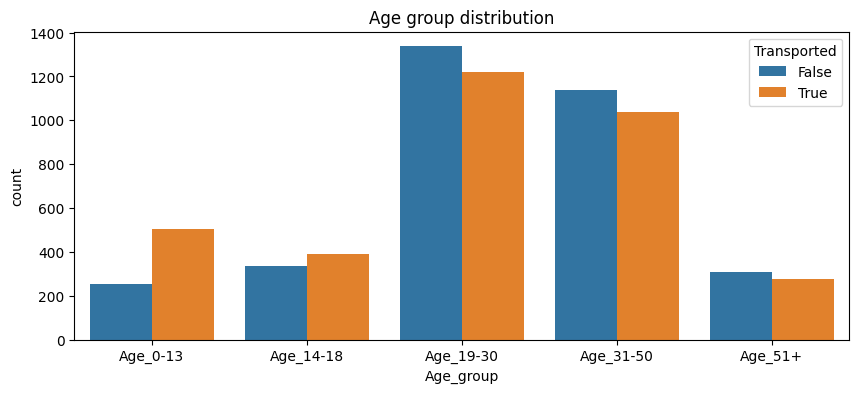

In [198]:
plt.figure(figsize=(10,4))
g=sns.countplot(data=X_train, x='Age_group', hue='Transported', order=['Age_0-13','Age_14-18','Age_19-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')

**Cabin**

We will now extract deck, cabin number and side from cabin.

In [199]:
# Replace NaN's with outliers for now (so we can split feature)
X_train['Cabin'].fillna('Z/9999/Z', inplace=True)
X_test['Cabin'].fillna('Z/9999/Z', inplace=True)

#train set
cabin = X_train['Cabin'].str.split('/', expand=True)
X_train['Cabin_deck'] = cabin[0]
X_train['Cabin_number'] = cabin[1].astype(int)
X_train['Cabin_side'] = cabin[2]

# test set
cabin = X_test['Cabin'].str.split('/', expand=True)
X_test['Cabin_deck'] = cabin[0]
X_test['Cabin_number'] = cabin[1].astype(int)
X_test['Cabin_side'] = cabin[2]

# Put Nan's back in (we will fill these later)
# Train set
X_train.loc[X_train['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
X_train.loc[X_train['Cabin_number']==9999, 'Cabin_number']=np.nan
X_train.loc[X_train['Cabin_side']=='Z', 'Cabin_side']=np.nan

# Test set
X_test.loc[X_test['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
X_test.loc[X_test['Cabin_number']==9999, 'Cabin_number']=np.nan
X_test.loc[X_test['Cabin_side']=='Z', 'Cabin_side']=np.nan

# Drop Cabin (we don't need it anymore)
X_train.drop('Cabin', axis=1, inplace=True)
X_test.drop('Cabin', axis=1, inplace=True)


C:\Users\Yuval\AppData\Local\Temp\ipykernel_4912\3082533263.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Cabin'].fillna('Z/9999/Z', inplace=True)
C:\Users\Yuval\AppData\Local\Temp\ipykernel_4912\3082533263.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

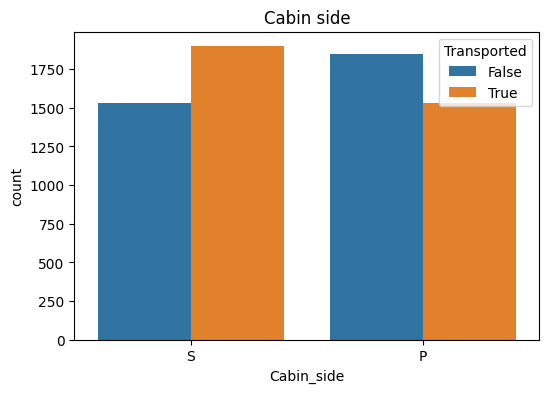

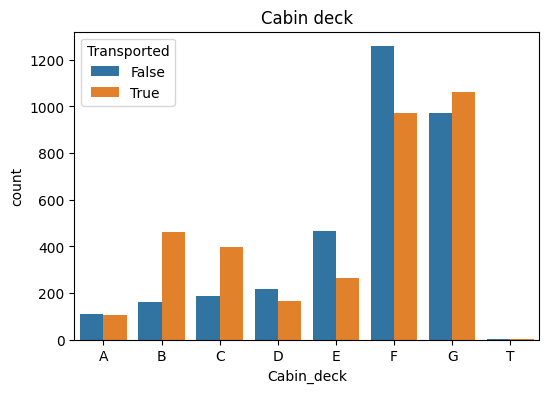

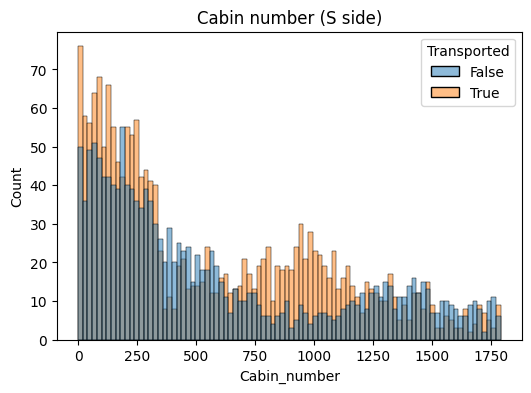

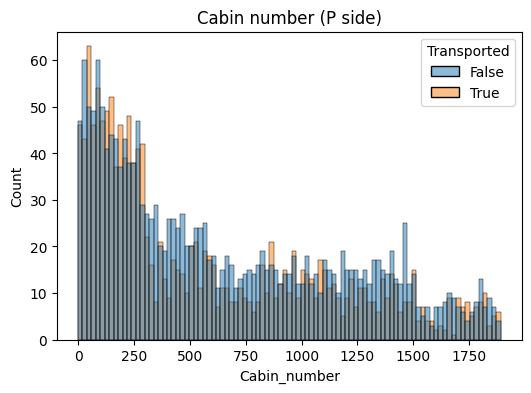

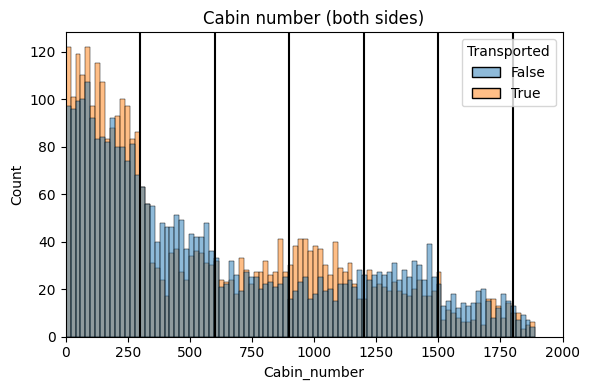

In [200]:
figsize=(6,4)
# Plot distribution of new features
plt.figure(figsize=figsize)
sns.countplot(data=X_train, x='Cabin_side', hue='Transported')
plt.title('Cabin side')

plt.figure(figsize=figsize)
sns.countplot(data=X_train, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.figure(figsize=figsize)
sns.histplot(
    data=X_train[X_train["Cabin_side"] == "S"],
    x="Cabin_number",
    hue="Transported",
    binwidth=20
)
plt.title('Cabin number (S side)')

plt.figure(figsize=figsize)
sns.histplot(
    data=X_train[X_train["Cabin_side"] == "P"],
    x="Cabin_number",
    hue="Transported",
    binwidth=20
)
plt.title('Cabin number (P side)')

plt.figure(figsize=figsize)
sns.histplot(data=X_train, x='Cabin_number', hue='Transported',binwidth=20)
plt.axvline(300, color='black')
plt.axvline(600,  color='black')
plt.axvline(900, color='black')
plt.axvline(1200, color='black')
plt.axvline(1500, color='black')
plt.axvline(1800, color='black')
plt.title('Cabin number (both sides)')
plt.xlim([0,2000])

plt.tight_layout()
plt.show()


we noticed we can aggregate cabin number from both ship sides, now we got a result we can divide into chunks of 300 cabins. This will allow us to compress this feature into categorical feature, which we expect it to work much better then raw cabin numbers.

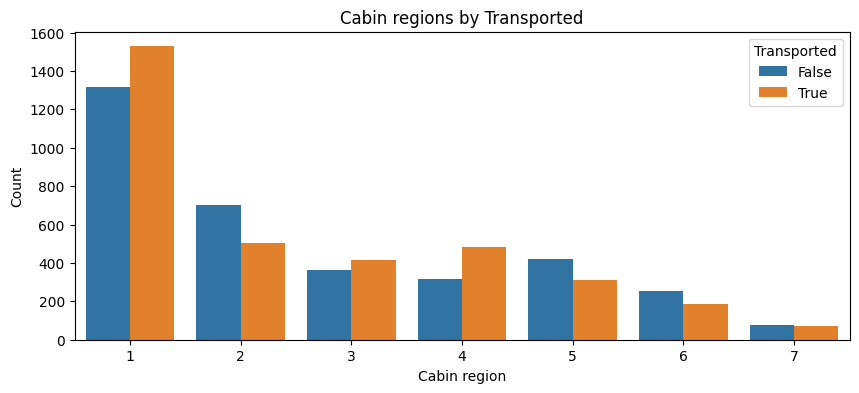

In [201]:
X_train['Cabin_region1'] = (X_train['Cabin_number'] < 300).astype(int)
X_train['Cabin_region2'] = ((X_train['Cabin_number'] >= 300) & (X_train['Cabin_number'] < 600)).astype(int)
X_train['Cabin_region3'] = ((X_train['Cabin_number'] >= 600) & (X_train['Cabin_number'] < 900)).astype(int)
X_train['Cabin_region4'] = ((X_train['Cabin_number'] >= 900) & (X_train['Cabin_number'] < 1200)).astype(int)
X_train['Cabin_region5'] = ((X_train['Cabin_number'] >= 1200) & (X_train['Cabin_number'] < 1500)).astype(int)
X_train['Cabin_region6'] = (X_train['Cabin_number'] >= 1500).astype(int)

X_test['Cabin_region1'] = (X_test['Cabin_number'] < 300).astype(int)
X_test['Cabin_region2'] = ((X_test['Cabin_number'] >= 300) & (X_test['Cabin_number'] < 600)).astype(int)
X_test['Cabin_region3'] = ((X_test['Cabin_number'] >= 600) & (X_test['Cabin_number'] < 900)).astype(int)
X_test['Cabin_region4'] = ((X_test['Cabin_number'] >= 900) & (X_test['Cabin_number'] < 1200)).astype(int)
X_test['Cabin_region5'] = ((X_test['Cabin_number'] >= 1200) & (X_test['Cabin_number'] < 1500)).astype(int)
X_test['Cabin_region6'] = (X_test['Cabin_number'] >= 1500).astype(int)

# If Cabin_number is NaN (or any value not captured above), mark as unknown region
X_train['Cabin_region_unknown'] = (
    (X_train[['Cabin_region1','Cabin_region2','Cabin_region3','Cabin_region4','Cabin_region5','Cabin_region6']].sum(axis=1) == 0)
).astype(int)

X_test['Cabin_region_unknown'] = (
    (X_test[['Cabin_region1','Cabin_region2','Cabin_region3','Cabin_region4','Cabin_region5','Cabin_region6']].sum(axis=1) == 0)
).astype(int)

# Create a single integer label just for plotting (1-7)
X_train['Cabin_regions_plot'] = (
    X_train['Cabin_region1']
    + 2 * X_train['Cabin_region2']
    + 3 * X_train['Cabin_region3']
    + 4 * X_train['Cabin_region4']
    + 5 * X_train['Cabin_region5']
    + 6 * X_train['Cabin_region6']
    + 7 * X_train['Cabin_region_unknown']
).astype(int)

# Plot with fixed x-axis categories 1-7
plt.figure(figsize=(10,4))
sns.countplot(
    data=X_train,
    x='Cabin_regions_plot',
    hue='Transported',
    order=[1,2,3,4,5,6,7]
)
plt.xlabel('Cabin region')
plt.ylabel('Count')
plt.title('Cabin regions by Transported')
plt.xticks([0,1,2,3,4,5,6], ['1','2','3','4','5','6','7'])
plt.show()

# Clean up helper column (optional)
X_train.drop(columns=['Cabin_regions_plot'], inplace=True)


#### Filling NaNs

**Last name**

In [202]:
missing_name_count = X_train['Name'].isna().sum()
print("Missing names before filling:", missing_name_count)

Missing names before filling: 156


In [203]:
# Fill missing names
X_train['Name'].fillna('Unknown Unknown', inplace=True)
X_test['Name'].fillna('Unknown Unknown', inplace=True)

# Split Name into First and Last names
full_name = X_train['Name'].str.split(' ')
X_train['First_name'] = full_name.str[0]
X_train['Last_name'] = full_name.str[1]

full_name = X_test['Name'].str.split(' ')
X_test['First_name'] = full_name.str[0]
X_test['Last_name'] = full_name.str[1]

print("first name examples:", X_train['First_name'].unique()[:10])
print("last name examples:", X_train['Last_name'].unique()[:10])

first name examples: ['Wezna' 'Therek' 'Torms' 'Tanley' 'Alphah' 'Graven' 'Eltard' 'Azharga'
 'Gorsp' 'Earlie']
last name examples: ['Baleful' 'Hinetthews' 'Fone' 'Mirandry' 'Cratrave' 'Dreamspric'
 'Unpasine' 'Biba' 'Solinez' 'Nasquez']


C:\Users\Yuval\AppData\Local\Temp\ipykernel_4912\3261594914.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Name'].fillna('Unknown Unknown', inplace=True)
C:\Users\Yuval\AppData\Local\Temp\ipykernel_4912\3261594914.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

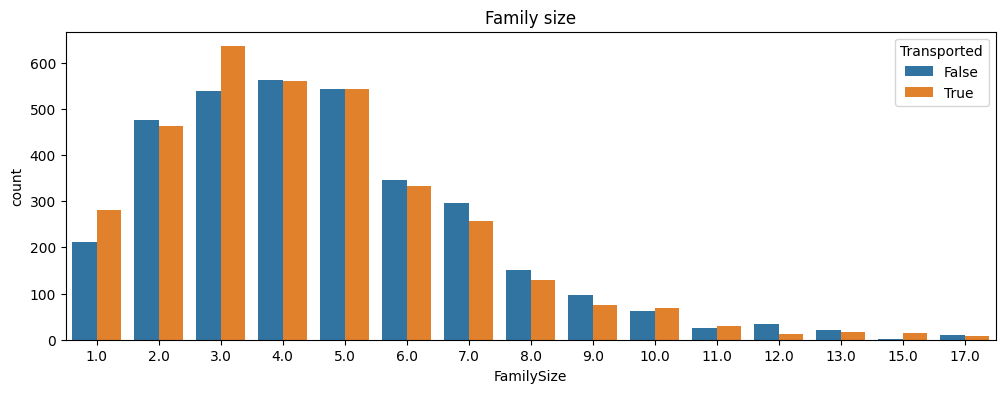

In [204]:
# Family size feature
X_train['FamilySize'] = X_train['Last_name'].map(X_train['Last_name'].value_counts())
X_test['FamilySize'] = X_test['Last_name'].map(X_test['Last_name'].value_counts())

X_train.loc[X_train['Last_name'] == 'Unknown', 'Last_name'] = np.nan
X_test.loc[X_test['Last_name'] == 'Unknown', 'Last_name'] = np.nan
# Putting NaN's back in for FamilySize where names were missing
X_train.loc[X_train['FamilySize'] == missing_name_count, 'FamilySize'] = np.nan
X_test.loc[X_test['FamilySize'] == missing_name_count, 'FamilySize'] = np.nan

# Drop Name
X_train.drop('Name', axis=1, inplace=True)
X_test.drop('Name', axis=1, inplace=True)

plt.figure(figsize=(12,4))
sns.countplot(data=X_train, x='FamilySize', hue='Transported')
plt.title('Family size')
plt.show()

### Missing Values

**Counting missing values**

In [205]:
print_nulls_info(X_train, exlude_zero=True)

+--------------+-----------+------------+-----------------+
| Column Name  | Data Type | Null Count | Null Percentage |
+--------------+-----------+------------+-----------------+
|  HomePlanet  |   object  |    156     |      2.24%      |
|  CryoSleep   |   object  |    170     |      2.44%      |
| Destination  |   object  |    149     |      2.14%      |
|     Age      |  float64  |    146     |      2.10%      |
|     VIP      |   object  |    176     |      2.53%      |
| RoomService  |  float64  |    151     |      2.17%      |
|  FoodCourt   |  float64  |    148     |      2.13%      |
| ShoppingMall |  float64  |    172     |      2.47%      |
|     Spa      |  float64  |    152     |      2.19%      |
|    VRDeck    |  float64  |    146     |      2.10%      |
|  Age_group   |   object  |    146     |      2.10%      |
|  Cabin_deck  |   object  |    151     |      2.17%      |
| Cabin_number |  float64  |    151     |      2.17%      |
|  Cabin_side  |   object  |    151     

About 2% of the data is missing.

**Missing values per passenger**

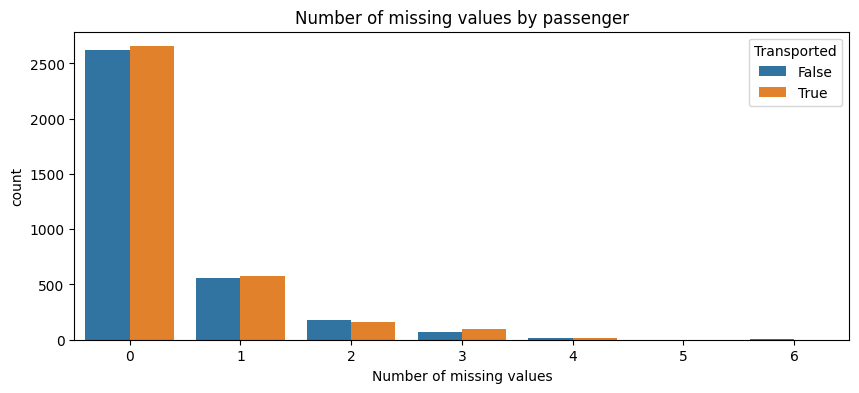

In [206]:
plt.figure(figsize=(10,4))
sns.countplot(data=X_train, x=X_train.isna().sum(axis=1), hue='Transported')
plt.title('Number of missing values by passenger')
plt.xlabel('Number of missing values')
plt.show()

Missing values are not related to transported column. 

***AI used [3]***

In [207]:
# Number of passenger with missing values 
num_passengers_with_missing = (X_train.isna().any(axis=1)).sum()
print("Number of passengers with missing values:", num_passengers_with_missing)

Number of passengers with missing values: 1680


Text(0.5, 1.0, 'Heatmap of missing values')

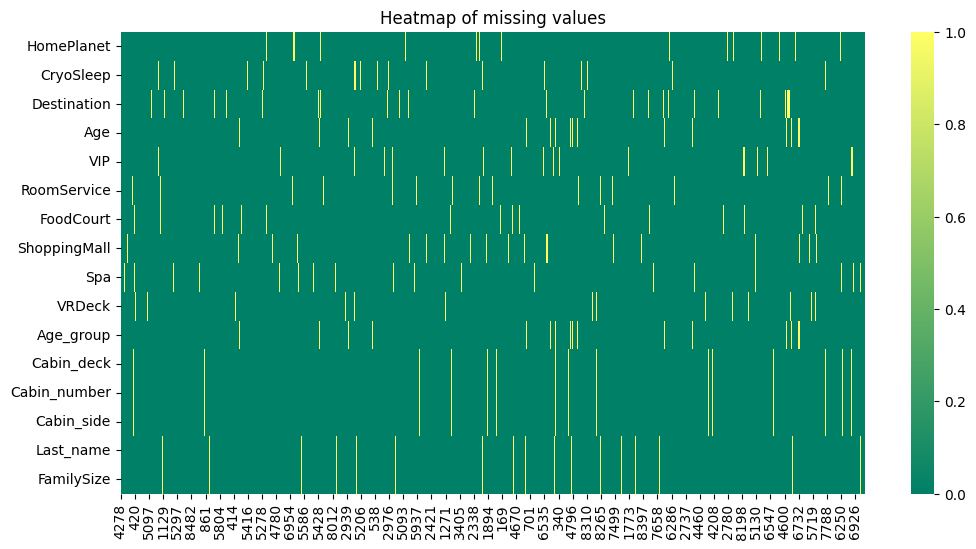

In [208]:
na_cols=X_train.columns[X_train.isna().any()].tolist()
# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(X_train[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

Missingness co-occurrence (heatmap):

- The heatmap indicates which features tend to be missing together for the same row.
- When missingness aligns across derived features (for example, `Last_name` and `FamilySize` after splitting `Name`), it is expected because they originate from the same raw column.
- This supports the assumption that imputations for these derived features should be consistent and may use shared logic (for example, using `PassengerGroup` to infer family-related fields).

**HomePlanet and Group**

***AI used [4]***

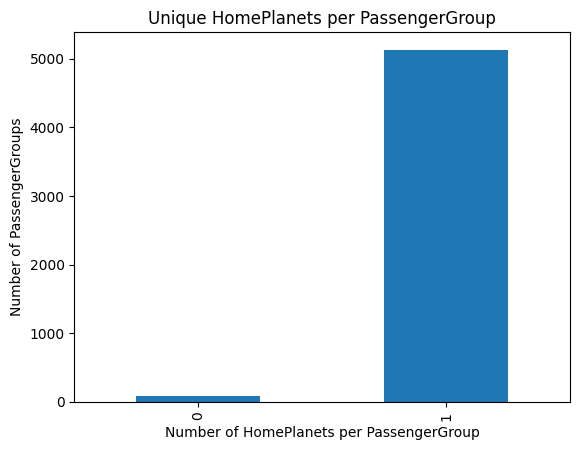

In [209]:
unique_hp_per_group = (
    X_train.groupby('PassengerGroup')['HomePlanet']
      .nunique()
)

unique_hp_per_group.value_counts().sort_index().plot(kind='bar')

plt.xlabel('Number of HomePlanets per PassengerGroup')
plt.ylabel('Number of PassengerGroups')
plt.title('Unique HomePlanets per PassengerGroup')
plt.show()

HomePlanet vs PassengerGroup:

- The plot suggests that passengers in the same `PassengerGroup` almost always share the same `HomePlanet`.
- Assumption used for imputation:
  - If a group has at least one known `HomePlanet`, we impute the missing `HomePlanet` values in that group with the group's most frequent `HomePlanet`.


***AI used [5]***

In [210]:
single_hp_groups = unique_hp_per_group[unique_hp_per_group == 1].index

group_to_hp = (X_train[X_train['PassengerGroup'].isin(single_hp_groups)]
               .groupby('PassengerGroup')['HomePlanet'].first())

before_train = X_train['HomePlanet'].isna().sum()
before_test  = X_test['HomePlanet'].isna().sum()

X_train.loc[X_train['HomePlanet'].isna(), 'HomePlanet'] = (
    X_train.loc[X_train['HomePlanet'].isna(), 'PassengerGroup'].map(group_to_hp)
)

X_test.loc[X_test['HomePlanet'].isna(), 'HomePlanet'] = (
    X_test.loc[X_test['HomePlanet'].isna(), 'PassengerGroup'].map(group_to_hp)
)

after_train = X_train['HomePlanet'].isna().sum()
after_test  = X_test['HomePlanet'].isna().sum()

print("Train - missing before:", before_train, "after:", after_train, "filled:", before_train - after_train)
print("Test  - missing before:", before_test,  "after:", after_test,  "filled:", before_test - after_test)


Train - missing before: 156 after: 91 filled: 65
Test  - missing before: 45 after: 29 filled: 16


**HomePlant and Cabin_Deck**

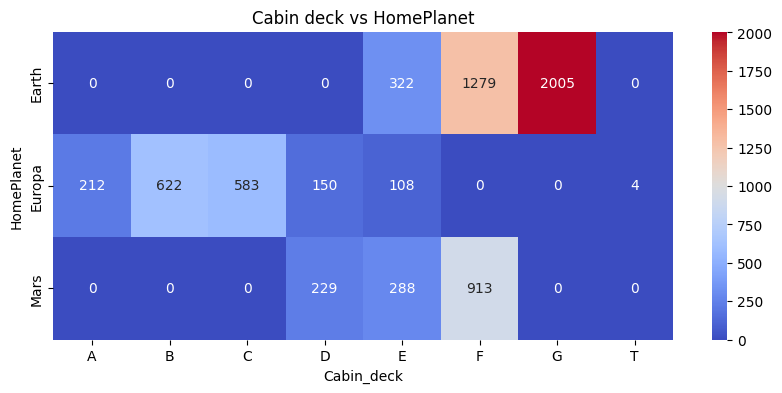

In [211]:
CD_HP = X_train.groupby(['Cabin_deck', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

plt.figure(figsize=(10,4))
sns.heatmap(CD_HP.T, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Cabin deck vs HomePlanet')
plt.show()

HomePlanet vs Cabin_deck:

From the heatmap we identify decks that appear to map almost deterministically to a single `HomePlanet` in the labeled data.

How this is used:
- If a deck is effectively 100% associated with one planet in the observed data, we can impute missing `HomePlanet` for passengers on that deck using that planet.

Important caveat:
- This relies on the training data distribution and may not generalize.
- We should treat it as a heuristic and verify its impact by comparing classifier performance with and without this imputation rule.

In [212]:
# Start number of missing HomePlanet values
HP_starts = X_train['HomePlanet'].isna().sum()
HP_starts_test = X_test['HomePlanet'].isna().sum()

# Fill missing HomePlanet values based on Cabin_deck
X_train.loc[(X_train['HomePlanet'].isna()) & (X_train['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet'] = 'Europa'
X_train.loc[(X_train['HomePlanet'].isna()) & (X_train['Cabin_deck'].isin(['G'])), 'HomePlanet'] = 'Earth'
X_test.loc[(X_test['HomePlanet'].isna()) & (X_test['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet'] = 'Europa'
X_test.loc[(X_test['HomePlanet'].isna()) & (X_test['Cabin_deck'].isin(['G'])), 'HomePlanet'] = 'Earth'

# Print number of missing values
print("Train")
print("Number of missing HomePlanet values before filling:", HP_starts)
print("HomePlanet missing values filled from Cabin_deck:", HP_starts - X_train['HomePlanet'].isna().sum())
print("Number of missing HomePlanet values after filling:", X_train['HomePlanet'].isna().sum())
print("\nTest")
print("Number of missing HomePlanet values before filling (test):", HP_starts_test)
print("HomePlanet missing values filled from Cabin_deck (test):", HP_starts_test - X_test['HomePlanet'].isna().sum())
print("Number of missing HomePlanet values after filling (test):", X_test['HomePlanet'].isna().sum())


Train
Number of missing HomePlanet values before filling: 91
HomePlanet missing values filled from Cabin_deck: 35
Number of missing HomePlanet values after filling: 56

Test
Number of missing HomePlanet values before filling (test): 29
HomePlanet missing values filled from Cabin_deck (test): 15
Number of missing HomePlanet values after filling (test): 14


**HomePlanet and Last_Name**

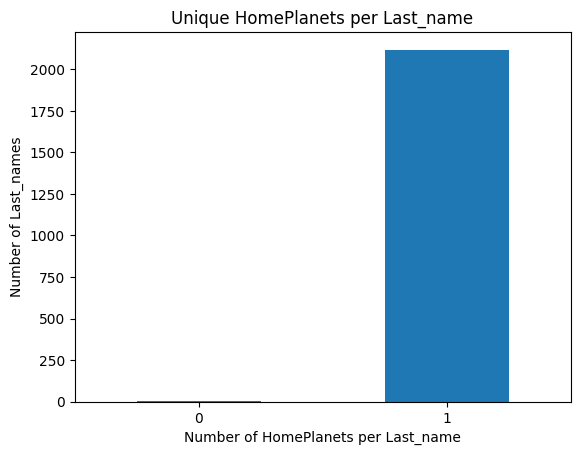

In [213]:
unique_hp_per_group_LN = (
    X_train.groupby('Last_name')['HomePlanet']
      .nunique()
)

unique_hp_per_group_LN.value_counts().sort_index().plot(kind='bar')

plt.xlabel('Number of HomePlanets per Last_name')
plt.xticks(rotation=0)
plt.ylabel('Number of Last_names')
plt.title('Unique HomePlanets per Last_name')
plt.show()

Passengers with the same last name came from the same home planet

In [214]:
HP_bef = X_train['HomePlanet'].isna().sum()
HP_bef_test = X_test['HomePlanet'].isna().sum()
single_hp_groups_LN = unique_hp_per_group_LN[unique_hp_per_group_LN == 1].index

group_to_hp = (X_train[X_train['Last_name'].isin(single_hp_groups_LN)]
               .groupby('Last_name')['HomePlanet'].first())

X_train.loc[X_train['HomePlanet'].isna(), 'HomePlanet'] = (
    X_train.loc[X_train['HomePlanet'].isna(), 'Last_name'].map(group_to_hp))
X_test.loc[X_test['HomePlanet'].isna(), 'HomePlanet'] = (
    X_test.loc[X_test['HomePlanet'].isna(), 'Last_name'].map(group_to_hp))

# print number of missing values
print("\nTrain")
print("Number of missing HomePlanet values before filling:",HP_bef )
print("HomePlanet missing values filled from Last_name:", HP_bef - X_train['HomePlanet'].isna().sum())
print("Number of missing HomePlanet values after filling:", X_train['HomePlanet'].isna().sum())
print("\nTest")
print("Number of missing HomePlanet values before filling (test):", HP_bef_test)
print("HomePlanet missing values filled from Last_name (test):", HP_bef_test - X_test['HomePlanet'].isna().sum())
print("Number of missing HomePlanet values after filling (test):", X_test['HomePlanet'].isna().sum())



Train
Number of missing HomePlanet values before filling: 56
HomePlanet missing values filled from Last_name: 49
Number of missing HomePlanet values after filling: 7

Test
Number of missing HomePlanet values before filling (test): 14
HomePlanet missing values filled from Last_name (test): 11
Number of missing HomePlanet values after filling (test): 3


In [215]:
X_train[X_train['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region_unknown,First_name,Last_name,FamilySize
4861,5187_01,NaN,False,TRAPPIST-1e,20.0,False,949.0,0.0,0.0,5.0,...,0,1,0,0,0,0,0,Ranuts,Mellé,1.0
5762,6108_01,NaN,False,TRAPPIST-1e,13.0,False,206.0,28.0,0.0,1.0,...,0,0,0,1,0,0,0,Unknown,NaN,NaN
5252,5603_01,NaN,False,TRAPPIST-1e,34.0,False,170.0,1256.0,0.0,3926.0,...,0,1,0,0,0,0,0,Kocha,Cluitty,1.0
186,0210_01,NaN,True,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,...,1,0,0,0,0,0,0,Arraid,Inicont,1.0
2274,2443_01,NaN,False,TRAPPIST-1e,31.0,False,1458.0,421.0,76.0,0.0,...,1,0,0,0,0,0,0,Unknown,NaN,NaN
225,0242_01,NaN,False,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,...,1,0,0,0,0,0,0,Almone,Sté,1.0
3091,3331_01,NaN,False,TRAPPIST-1e,40.0,False,666.0,4.0,83.0,0.0,...,0,0,1,0,0,0,0,Unknown,NaN,NaN


The remaining Passengers all have the same Destination and are all not VIPs


**HomePlant and VIP**

<Axes: xlabel='HomePlanet', ylabel='VIP'>

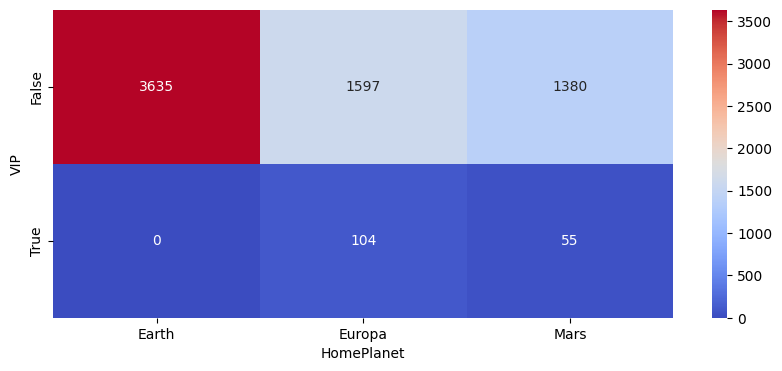

In [216]:
# Joint distribution of HomePlanet and VIP
HP_vip=X_train.groupby(['HomePlanet','VIP'])['VIP'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HP_vip.T, annot=True, fmt='g', cmap='coolwarm')

VIP vs HomePlanet:

VIP is rare compared to non-VIP, so raw counts can be misleading.
To avoid over-interpreting noise:
- We cross-check with additional relationships (for example Destination vs HomePlanet) before deciding on any VIP-driven imputation or feature engineering.

<Axes: xlabel='HomePlanet', ylabel='Destination'>

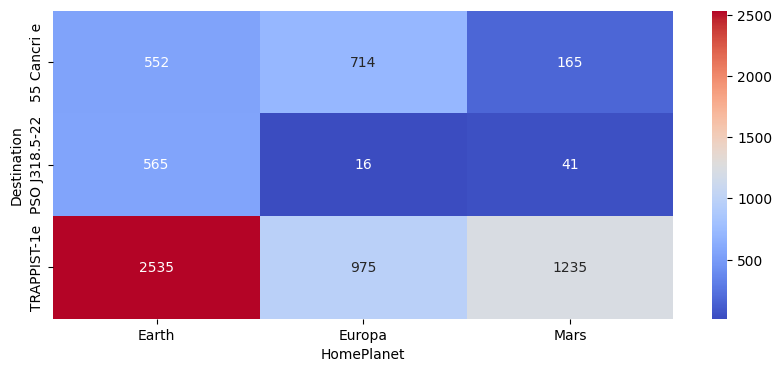

In [217]:
# Joint distribution of HomePlanet and Destination
HP_D=X_train.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HP_D.T, annot=True, fmt='g', cmap='coolwarm')

In [218]:
ddd = X_train[X_train['HomePlanet'].isna()]
ddd['Cabin_deck']

4861    E
5762    F
5252    E
186     D
2274    D
225     F
3091    F
Name: Cabin_deck, dtype: object

Missing passengers are only from deck D, E and F

By far most passengers heading to TRAPPIST-1e are from Earth, but we remember that earlier we found that no one from deck D is also from Earth.

In [219]:
# Missing values before
HP_bef=X_train['HomePlanet'].isna().sum()
HP_bef_test=X_test['HomePlanet'].isna().sum()

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
X_train.loc[(X_train['HomePlanet'].isna()) & ~(X_train['Cabin_deck']=='D'), 'HomePlanet']='Earth'
X_train.loc[(X_train['HomePlanet'].isna()) & (X_train['Cabin_deck']=='D'), 'HomePlanet']='Mars'
X_test.loc[(X_test['HomePlanet'].isna()) & ~(X_test['Cabin_deck']=='D'), 'HomePlanet']='Earth'
X_test.loc[(X_test['HomePlanet'].isna()) & (X_test['Cabin_deck']=='D'), 'HomePlanet']='Mars'

# Print number of missing values left
print('\nTrain')
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',X_train['HomePlanet'].isna().sum())
print('\nTest')
print('#HomePlanet missing values before (test):',HP_bef_test)
print('#HomePlanet missing values after (test):',X_test['HomePlanet'].isna().sum())


Train
#HomePlanet missing values before: 7
#HomePlanet missing values after: 0

Test
#HomePlanet missing values before (test): 3
#HomePlanet missing values after (test): 0


HomePlanet has no missing values.

**Filling Destination**

***AI used [6]***

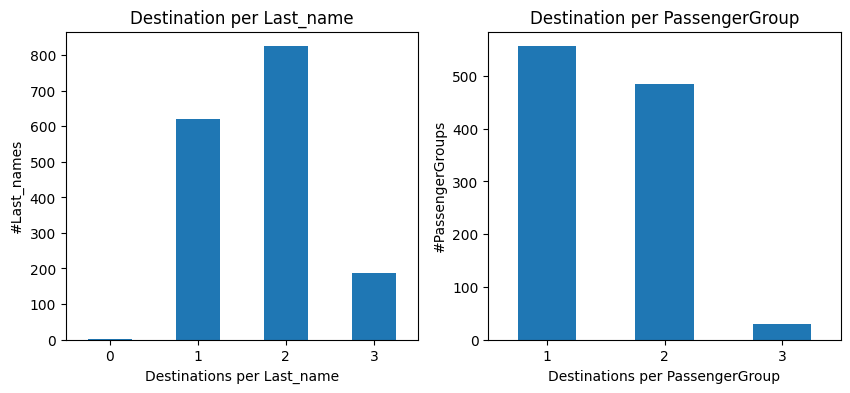

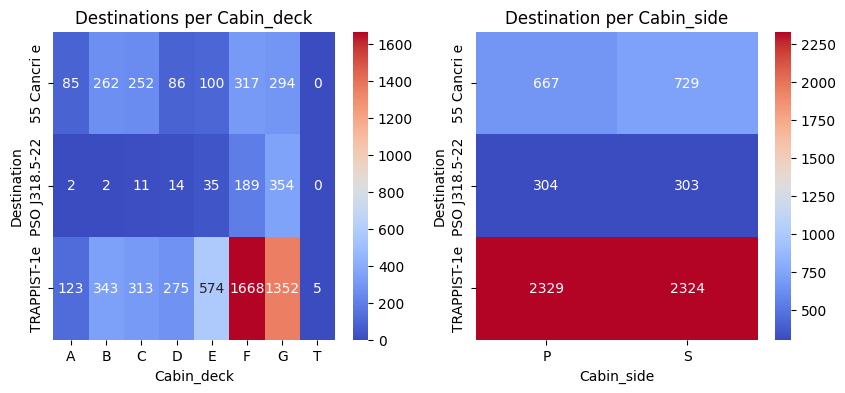

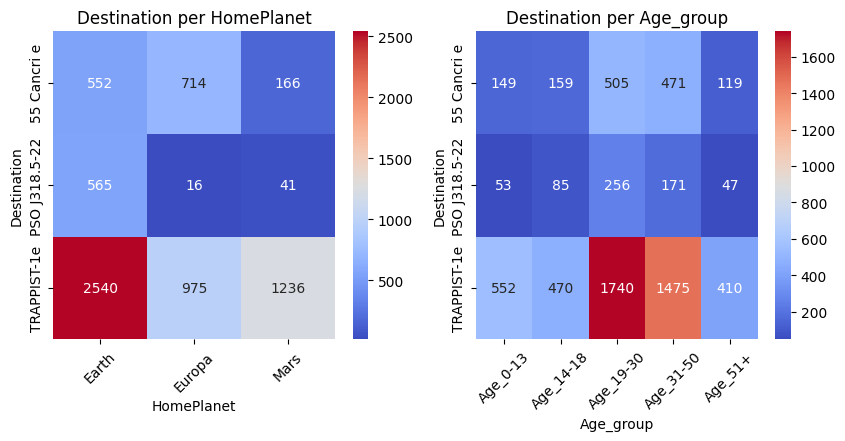

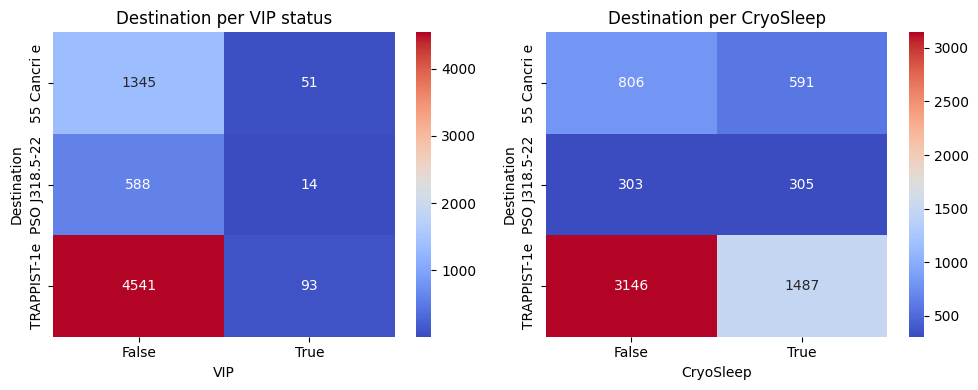

In [220]:
figsize=(10,4)

plt.figure(figsize=figsize)

# Destination per Last_name
multi_lastname_groups = X_train['Last_name'].value_counts()
multi_lastname_groups = multi_lastname_groups[multi_lastname_groups > 1].index

plt.subplot(1,2,1)
dst_LN = (
    X_train[X_train['Last_name'].isin(multi_lastname_groups)]
    .groupby('Last_name')['Destination']
    .nunique()
)
dst_LN.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Destinations per Last_name')
plt.xticks(rotation=0)
plt.ylabel('#Last_names')
plt.title('Destination per Last_name')

# Destination per PassengerGroup (only groups with more than 1 member)
multi_passenger_groups = X_train['PassengerGroup'].value_counts()
multi_passenger_groups = multi_passenger_groups[multi_passenger_groups > 1].index

plt.subplot(1,2,2)
dst_pg = (
    X_train[X_train['PassengerGroup'].isin(multi_passenger_groups)]
    .groupby('PassengerGroup')['Destination']
    .nunique()
)
dst_pg.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Destinations per PassengerGroup')
plt.ylabel('#PassengerGroups')
plt.xticks(rotation=0)
plt.title('Destination per PassengerGroup')

plt.figure(figsize=figsize)

# Destination per Cabin_deck
plt.subplot(1,2,1)
CS_D = X_train.groupby(['Cabin_deck', 'Destination'])['Destination'].size().unstack().fillna(0)
sns.heatmap(CS_D.T, annot=True, fmt='g', cmap='coolwarm')
plt.title('Destinations per Cabin_deck')
plt.xticks(rotation=0)

# Destination per Cabin_side
plt.subplot(1,2,2)
dst_cs=X_train.groupby(['Cabin_side','Destination'])['Destination'].size().unstack().fillna(0)
sns.heatmap(dst_cs.T, annot=True, fmt='g', cmap='coolwarm')
plt.title('Destination per Cabin_side')

plt.figure(figsize=figsize)

# Destination per homeplanet
HP_D= X_train.groupby(['HomePlanet', 'Destination'])['Destination'].size().unstack().fillna(0)
plt.subplot(1,2,1)
sns.heatmap(HP_D.T, annot=True, fmt='g', cmap='coolwarm')
plt.title('Destination per HomePlanet')
plt.xticks(rotation=45)

# Destination per age group
AG_D= X_train.groupby(['Age_group', 'Destination'])['Destination'].size().unstack().fillna(0)
plt.subplot(1,2,2)
sns.heatmap(AG_D.T, annot=True, fmt='g', cmap='coolwarm')
plt.title('Destination per Age_group')
plt.xticks(rotation=45)

plt.figure(figsize=figsize)

# Destination per total spent
TS_D= X_train.groupby(['VIP', 'Destination'])['Destination'].size().unstack().fillna(0)
plt.subplot(1,2,1)
sns.heatmap(TS_D.T, annot=True, fmt='g', cmap='coolwarm')
plt.title('Destination per VIP status')

# Destination per CryoSleep
CS_D= X_train.groupby(['CryoSleep', 'Destination'])['Destination'].size().unstack().fillna(0)
plt.subplot(1,2,2)
sns.heatmap(CS_D.T, annot=True, fmt='g', cmap='coolwarm')
plt.title('Destination per CryoSleep')


plt.tight_layout()
plt.show()

In [221]:
dest_cnt = X_train['Destination'].value_counts()

print("Destination value counts:\n", dest_cnt)

sum_dst = dest_cnt.sum()
print("Total number of passengers with Destination:", sum_dst)
print(" ")

print("TRAPPIST-1e percentage:", dest_cnt['TRAPPIST-1e']/sum_dst*100)
print("55 Cancris percentage:", dest_cnt['55 Cancri e']/sum_dst*100)
print("PSO J318.5-22 percentage:", dest_cnt['PSO J318.5-22']/sum_dst*100)

Destination value counts:
 Destination
TRAPPIST-1e      4751
55 Cancri e      1432
PSO J318.5-22     622
Name: count, dtype: int64
Total number of passengers with Destination: 6805
 
TRAPPIST-1e percentage: 69.81631153563556
55 Cancris percentage: 21.043350477590007
PSO J318.5-22 percentage: 9.14033798677443


Destination imputation decision:

After checking multiple conditional plots and tables, we did not find a strong rule-based relationship that predicts `Destination` reliably from other features without creating many exceptions.

Chosen approach (explicit assumption):
- Impute missing `Destination` with the global mode (most common destination).
Rationale:
- This minimizes the number of extra assumptions.
- We will later validate whether this harms performance by comparing cross-validated results with alternative strategies (for example: keep Destination missing as a separate category).

In [222]:
X_train['Destination'] = X_train['Destination'].fillna('TRAPPIST-1e')
X_test['Destination'] = X_test['Destination'].fillna('TRAPPIST-1e')
print("Train")
print("Number of missing values in Destination after filling:", X_train['Destination'].isna().sum())
print("\nTest")
print("Number of missing values in Destination after filling:", X_test['Destination'].isna().sum())

Train
Number of missing values in Destination after filling: 0

Test
Number of missing values in Destination after filling: 0


**Last_Name and PassengerGroup**

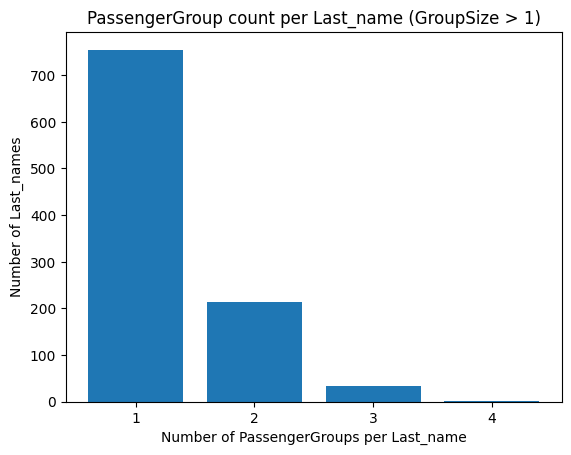

In [223]:
# New feeature GroupSize
pg_counts = X_train['PassengerGroup'].value_counts()
X_train['GroupSize'] = X_train.groupby('PassengerGroup')['PassengerGroup'].transform('size')
X_test['GroupSize'] = X_test.groupby('PassengerGroup')['PassengerGroup'].transform('size')


df_multi = X_train[X_train['GroupSize'] > 1]

unique_pg_per_ln = (
    df_multi
    .groupby('Last_name')['PassengerGroup']
    .nunique()
)

counts = unique_pg_per_ln.value_counts().sort_index()

plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Number of PassengerGroups per Last_name')
plt.ylabel('Number of Last_names')
plt.title('PassengerGroup count per Last_name (GroupSize > 1)')
plt.show()

Imputing Last_name from PassengerGroup:

The plot shows that most passenger groups share a single last name.
Assumption for imputation:
- Missing `Last_name` values were imputed only when a passenger group contained more than one member and exactly one known surname.

***[7]*** AI use

In [224]:
def fill_missing_feats(df, group_col, target_col):
    for _ , g in df.groupby(group_col):

        # Only fill if group has more than 1 member (otherwise we can't be sure)
        if len(g) <= 1:
            continue

        # Get known last names in the group
        known_last_names = g[target_col].dropna().unique()

        # Only fill if there is exactly 1 known last name in the group (otherwise we can't be sure)
        if len(known_last_names) != 1:
            continue

        df.loc[g.index, target_col] = g[target_col].fillna(known_last_names[0])

In [225]:
LN_starts = X_train['Last_name'].isna().sum(), X_test['Last_name'].isna().sum()
fill_missing_feats(X_train, 'PassengerGroup', 'Last_name')
fill_missing_feats(X_test, 'PassengerGroup', 'Last_name')

In [226]:
print('Train')
print('#Last_name missing values before:', LN_starts[0])
print('#Last_name missing values after:', (X_train['Last_name'].isna().sum()))
print('\nTest')
print('#Last_name missing values before (test):', LN_starts[1])
print('#Last_name missing values after (test):', (X_test['Last_name'].isna().sum()))

Train
#Last_name missing values before: 156
#Last_name missing values after: 100

Test
#Last_name missing values before (test): 44
#Last_name missing values after (test): 35


No additional features provide reliable and high confidence information for `Last_name` inference. Remaining missing values are therefore labeled as Unknown.

In [227]:
X_train['Last_name'] = X_train['Last_name'].fillna('Unknown')
X_test['Last_name'] = X_test['Last_name'].fillna('Unknown')

update familysize

In [228]:
# Count occurrences of each last name
last_name_counts = X_train['Last_name'].value_counts()

# Map counts back to rows
X_train['FamilySize'] = X_train['Last_name'].map(last_name_counts)
X_test['FamilySize'] = X_test['Last_name'].map(last_name_counts)

# Unknown surname => no family
X_train.loc[X_train['Last_name'] == 'Unknown', 'FamilySize'] = 0
X_test.loc[X_test['Last_name'] == 'Unknown', 'FamilySize'] = 0

# Unique last names => no family
X_train.loc[X_train['FamilySize'] == 1, 'FamilySize'] = 0
X_test.loc[X_test['FamilySize'] == 1, 'FamilySize'] = 0

print("train family size missing values:", X_train['FamilySize'].isna().sum())
print("test family size missing values:", X_test['FamilySize'].isna().sum())

train family size missing values: 0
test family size missing values: 114


**Cabin_side**

In [229]:
# Function to compute unique counts of a feature per PassengerGroup
def unique_counts_per_PassengerGroup(df, feature):
    per_group = (
        df[df['GroupSize'] > 1]
        .groupby('PassengerGroup')[feature]
        .nunique(dropna=True)
    )
    return per_group.value_counts().sort_index()

In [230]:
Group_CS = unique_counts_per_PassengerGroup(X_train, 'Cabin_side')

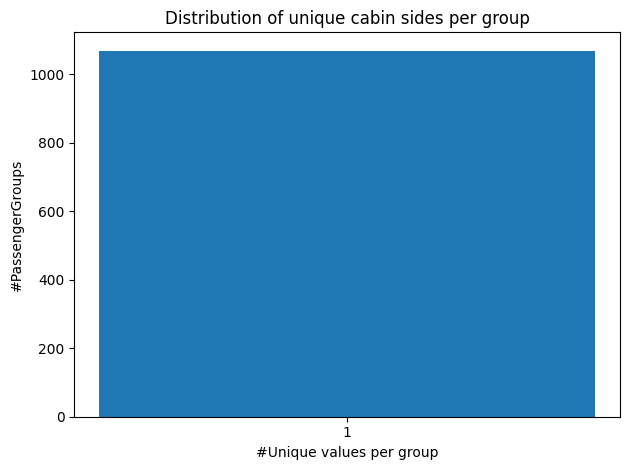

In [231]:
plt.bar(Group_CS.index.astype(str), Group_CS.values)
plt.xlabel('#Unique values per group')
plt.ylabel('#PassengerGroups')
plt.title('Distribution of unique cabin sides per group')

plt.tight_layout()
plt.show()

Cabin features within a group (GroupSize > 1):

Observed pattern:
- Passengers within the same `PassengerGroup` share exactly one cabin side.

How we use it:
- For missing `Cabin_side`, we fill it using group-based imputation, assigning the side observed for the passenger group.

In [232]:
CS_start = X_train['Cabin_side'].isna().sum(), X_test['Cabin_side'].isna().sum()

fill_missing_feats(X_train, 'PassengerGroup', 'Cabin_side')
fill_missing_feats(X_test, 'PassengerGroup', 'Cabin_side')

print('Train')
print('#Cabin_side missing values before:', CS_start[0])
print('#Cabin_side missing values after:', X_train['Cabin_side'].isna().sum())
print('\nTest')
print('#Cabin_side missing values before (test):', CS_start[1])
print('#Cabin_side missing values after (test):', X_test['Cabin_side'].isna().sum())

Train
#Cabin_side missing values before: 151
#Cabin_side missing values after: 86

Test
#Cabin_side missing values before (test): 48
#Cabin_side missing values after (test): 39


Try to fill the rest, so we examine the correlation between Cabin_side to other features.

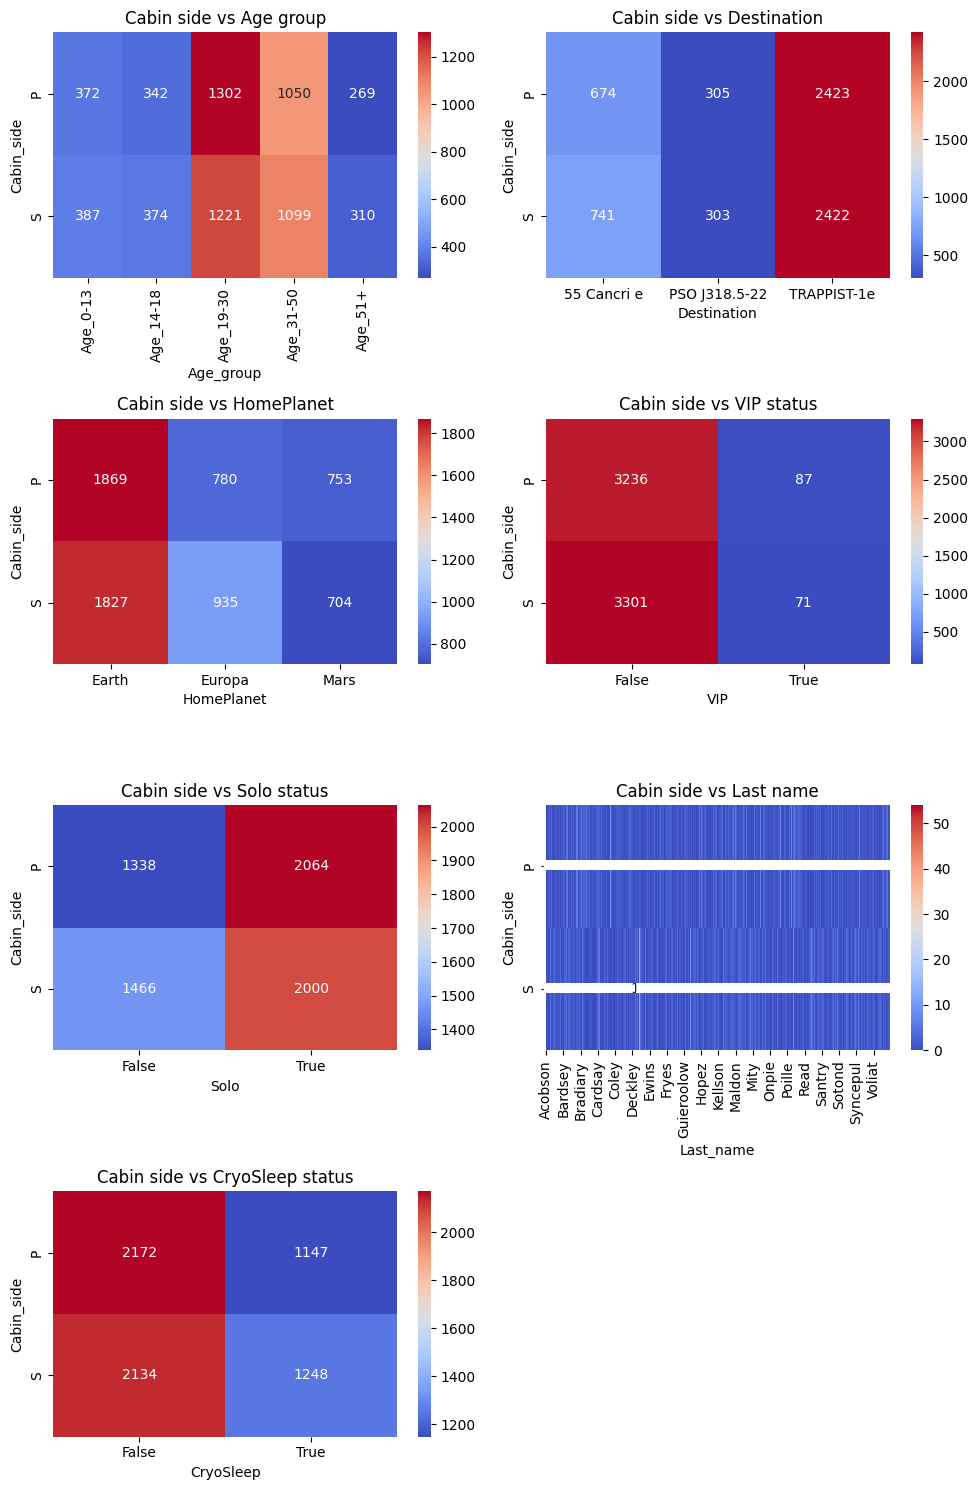

In [233]:
features = [
    ('Age_group', 'Cabin side vs Age group'),
    ('Destination', 'Cabin side vs Destination'),
    ('HomePlanet', 'Cabin side vs HomePlanet'),
    ('VIP', 'Cabin side vs VIP status'),
    ('Solo', 'Cabin side vs Solo status'),
    ('Last_name', 'Cabin side vs Last name'),
    ('CryoSleep', 'Cabin side vs CryoSleep status'),
]

plt.figure(figsize=(10,15))

for i, (feat, title) in enumerate(features, 1):
    plt.subplot(4, 2, i)
    
    table = (
        X_train.groupby([feat, 'Cabin_side'])
          .size()
          .unstack(fill_value=0)
    )
    
    sns.heatmap(
        table.T,
        annot=True,
        fmt=".0f",
        cmap='coolwarm'
    )
    
    plt.title(title)

plt.tight_layout()
plt.show()


None of the graphs provide sufficient justify for a reliable imputation rule.

thats the best we can do with cabin side, leave the rest 'unknown' and the one hot encode will handle them later.

In [234]:
X_train['Cabin_side'] = X_train['Cabin_side'].fillna('unknown')
X_test['Cabin_side'] = X_test['Cabin_side'].fillna('unknown')

**Cabin_deck**

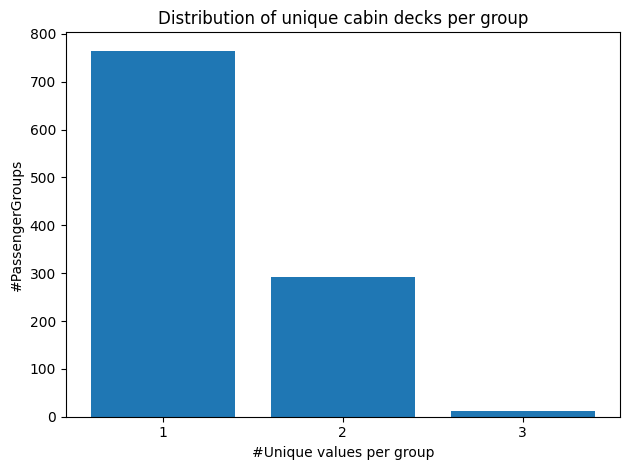

In [235]:
Group_CD = unique_counts_per_PassengerGroup(X_train, 'Cabin_deck')

plt.bar(Group_CD.index.astype(str), Group_CD.values)
plt.xlabel('#Unique values per group')
plt.ylabel('#PassengerGroups')
plt.title('Distribution of unique cabin decks per group')

plt.tight_layout()
plt.show()

Less deterministic than `Cabin_side` but still consistent, we completed the missing decks by inserting the cabin_deck value of a known deck from their same group, where we require that a 'known deck' only exists when that group has the same deck number for all passengers in the group.

In [236]:
CD_start = X_train['Cabin_deck'].isna().sum(), X_test['Cabin_deck'].isna().sum()

fill_missing_feats(X_train, 'PassengerGroup', 'Cabin_deck')
fill_missing_feats(X_test, 'PassengerGroup', 'Cabin_deck')

print('Train')
print('#Cabin_deck missing before:', CD_start[0])
print('#Cabin_deck missing after:', X_train['Cabin_deck'].isna().sum())
print('\nTest')
print('#Cabin_deck missing before (test):', CD_start[1])
print('#Cabin_deck missing after (test):', X_test['Cabin_deck'].isna().sum())


X_train['Cabin_deck'] = X_train['Cabin_deck'].fillna('unknown') # Fill remaining missing values with 'unknown'
X_test['Cabin_deck'] = X_test['Cabin_deck'].fillna('unknown') # Fill remaining missing values with 'unknown'

Train
#Cabin_deck missing before: 151
#Cabin_deck missing after: 96

Test
#Cabin_deck missing before (test): 48
#Cabin_deck missing after (test): 39


**Cabin number**

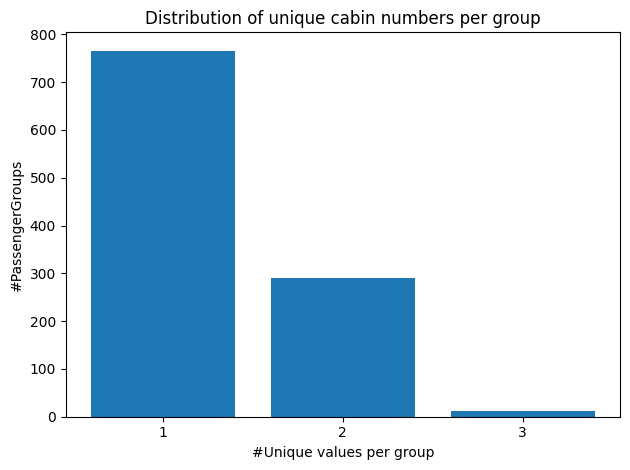

In [237]:
Group_CN = unique_counts_per_PassengerGroup(X_train, 'Cabin_number')

plt.bar(Group_CN.index.astype(str), Group_CN.values)
plt.xlabel('#Unique values per group')
plt.ylabel('#PassengerGroups')
plt.title('Distribution of unique cabin numbers per group')

plt.tight_layout()
plt.show()

From the same reasons as the `cabin_deck`, we filled the missing values the same.

In [238]:
CN_start = X_train['Cabin_number'].isna().sum(), X_test['Cabin_number'].isna().sum()

fill_missing_feats(X_train, 'PassengerGroup', 'Cabin_number')
fill_missing_feats(X_test, 'PassengerGroup', 'Cabin_number')

print('Train')
print('#Cabin_number missing before:', CN_start[0])
print('#Cabin_number missing after:', X_train['Cabin_number'].isna().sum())
print('\nTest')
print('#Cabin_number missing before (test):', CN_start[1])
print('#Cabin_number missing after (test):', X_test['Cabin_number'].isna().sum())


X_train['Cabin_number'] = X_train['Cabin_number'].fillna(9999) # Fill remaining missing values with max_cabin_num + 1
X_test['Cabin_number'] = X_test['Cabin_number'].fillna(9999) # Fill remaining missing values with max_cabin_num + 1

Train
#Cabin_number missing before: 151
#Cabin_number missing after: 96

Test
#Cabin_number missing before (test): 48
#Cabin_number missing after (test): 39


In [239]:
# Update cabin regions 

X_train['Cabin_region1'] = (X_train['Cabin_number'] < 300).astype(int)
X_train['Cabin_region2'] = ((X_train['Cabin_number'] >= 300) & (X_train['Cabin_number'] < 600)).astype(int)
X_train['Cabin_region3'] = ((X_train['Cabin_number'] >= 600) & (X_train['Cabin_number'] < 900)).astype(int)
X_train['Cabin_region4'] = ((X_train['Cabin_number'] >= 900) & (X_train['Cabin_number'] < 1200)).astype(int)
X_train['Cabin_region5'] = ((X_train['Cabin_number'] >= 1200) & (X_train['Cabin_number'] < 1500)).astype(int)
X_train['Cabin_region6'] = (X_train['Cabin_number'] >= 1500).astype(int)

# If Cabin_number is NaN (or any value not captured above), mark as unknown region
X_train['Cabin_region_unknown'] = (
    (X_train[['Cabin_region1','Cabin_region2','Cabin_region3','Cabin_region4','Cabin_region5','Cabin_region6']].sum(axis=1) == 0)
).astype(int)

X_test['Cabin_region1'] = (X_test['Cabin_number'] < 300).astype(int)
X_test['Cabin_region2'] = ((X_test['Cabin_number'] >= 300) & (X_test['Cabin_number'] < 600)).astype(int)
X_test['Cabin_region3'] = ((X_test['Cabin_number'] >= 600) & (X_test['Cabin_number'] < 900)).astype(int)
X_test['Cabin_region4'] = ((X_test['Cabin_number'] >= 900) & (X_test['Cabin_number'] < 1200)).astype(int)
X_test['Cabin_region5'] = ((X_test['Cabin_number'] >= 1200) & (X_test['Cabin_number'] < 1500)).astype(int)
X_test['Cabin_region6'] = (X_test['Cabin_number'] >= 1500).astype(int)

# If Cabin_number is NaN (or any value not captured above), mark as unknown region
X_test['Cabin_region_unknown'] = (
    (X_test[['Cabin_region1','Cabin_region2','Cabin_region3','Cabin_region4','Cabin_region5','Cabin_region6']].sum(axis=1) == 0)
).astype(int)

**VIP**

VIP missing values will be filled with False because this is the majority of the values in it and VIP is very skewed to False.

In [240]:
print(X_train['VIP'].value_counts())
# Fill missing VIP values with False
X_train['VIP'] = X_train['VIP'].fillna(False)
X_test['VIP'] = X_test['VIP'].fillna(False)

print('#VIP missing values (train):', X_train['VIP'].isna().sum())
print('#VIP missing values (test):', X_test['VIP'].isna().sum())

VIP
False    6619
True      159
Name: count, dtype: int64
#VIP missing values (train): 0
#VIP missing values (test): 0


C:\Users\Yuval\AppData\Local\Temp\ipykernel_4912\979846680.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['VIP'] = X_train['VIP'].fillna(False)
C:\Users\Yuval\AppData\Local\Temp\ipykernel_4912\979846680.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['VIP'] = X_test['VIP'].fillna(False)


**AGE**

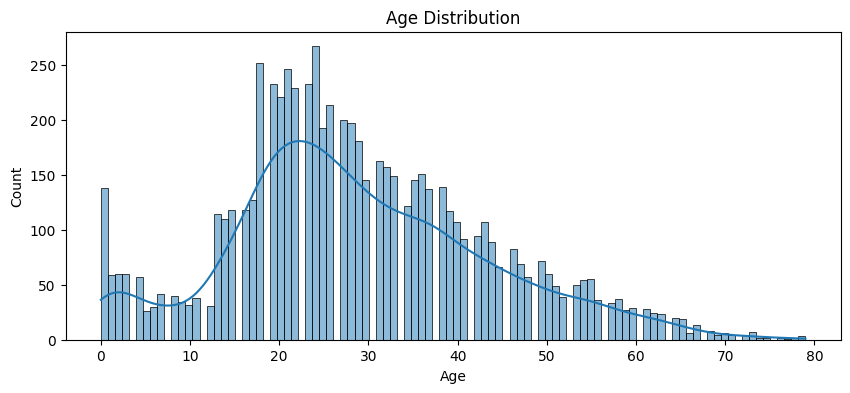

In [241]:
# age distribution total
plt.figure(figsize=(10,4))
sns.histplot(data=X_train, x='Age', bins=100, kde=True)
plt.title('Age Distribution')
plt.show()

Age distribution inference:

- Most passengers appear to be in the 18-40 range.
- There is a smaller cluster of children (approximately 0-12).
- There is right skewed with a long tail of older passengers.

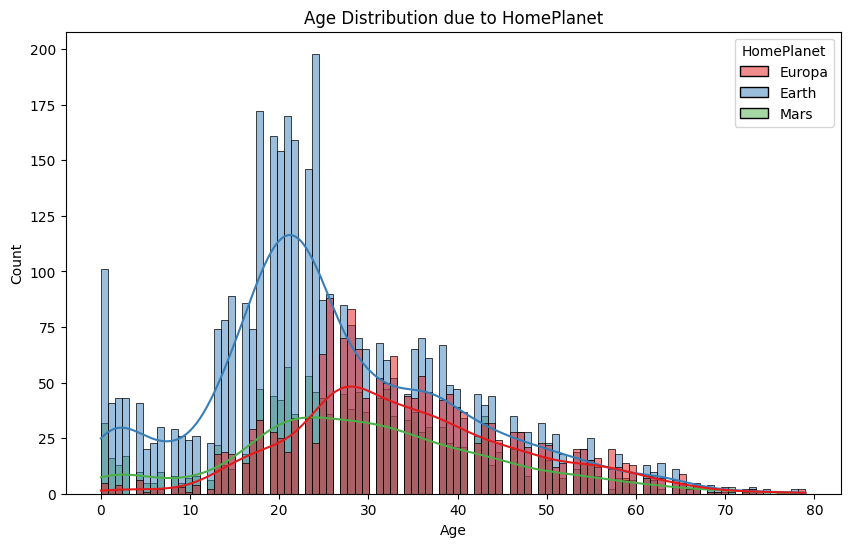

In [242]:
plt.figure(figsize=(10,6))
sns.histplot(data=X_train, bins=100 ,x='Age', hue='HomePlanet', kde=True, palette='Set1')
plt.title('Age Distribution due to HomePlanet')
plt.show()

Imputation implication:
- Because the distribution is right-skewed and contains outliers, median age is typically safer than mean if we impute a single value.

C:\Users\Yuval\AppData\Local\Temp\ipykernel_4912\618353036.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HomePlanet', y='Age', data=X_train, palette='Set1')


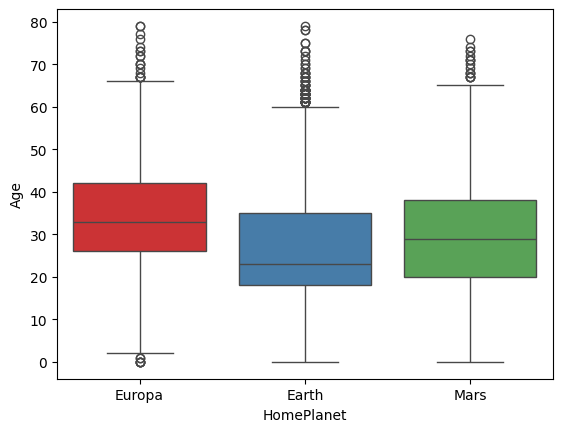

In [243]:
sns.boxplot(x='HomePlanet', y='Age', data=X_train, palette='Set1')
plt.show()

In [244]:
# Missing values before
Age_bef = X_train['Age'].isna().sum(), X_test['Age'].isna().sum()

global_age_median = X_train['Age'].median()
# Fill missing Age using median per HomePlanet
X_train['Age'] = X_train['Age'].fillna(global_age_median)
X_test['Age'] = X_test['Age'].fillna(global_age_median)

# Missing values after
print('Train')
print('#Age missing values before:', Age_bef[0])
print('#Age missing values after (train):', X_train['Age'].isna().sum())
print('Test')
print('#Age missing values before:', Age_bef[1])
print('#Age missing values after (test):', X_test['Age'].isna().sum())


Train
#Age missing values before: 146
#Age missing values after (train): 0
Test
#Age missing values before: 33
#Age missing values after (test): 0


Update Age group.

In [245]:
X_train['Age_group']=np.nan
X_train.loc[X_train['Age']<=13,'Age_group']='Age_0-13'
X_train.loc[(X_train['Age']>13) & (X_train['Age']<=18),'Age_group']='Age_14-18'
X_train.loc[(X_train['Age']>18) & (X_train['Age']<=30),'Age_group']='Age_19-30'
X_train.loc[(X_train['Age']>30) & (X_train['Age']<=50),'Age_group']='Age_31-50'
X_train.loc[X_train['Age']>50,'Age_group']='Age_51+'

# Test set
X_test['Age_group']=np.nan
X_test.loc[X_test['Age']<=13,'Age_group']='Age_0-13'
X_test.loc[(X_test['Age']>13) & (X_test['Age']<=18),'Age_group']='Age_14-18'
X_test.loc[(X_test['Age']>18) & (X_test['Age']<=30),'Age_group']='Age_19-30'
X_test.loc[(X_test['Age']>30) & (X_test['Age']<=50),'Age_group']='Age_31-50'
X_test.loc[X_test['Age']>50,'Age_group']='Age_51+'

C:\Users\Yuval\AppData\Local\Temp\ipykernel_4912\2019717048.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0-13' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_train.loc[X_train['Age']<=13,'Age_group']='Age_0-13'
C:\Users\Yuval\AppData\Local\Temp\ipykernel_4912\2019717048.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0-13' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_test.loc[X_test['Age']<=13,'Age_group']='Age_0-13'


**CryoSleep**

we believe that if we want to fill CryoSleep - Best way is to rely on their NoSpendings feature;
if someone's NoSpendings == False (means he spent something) and we have NaN CryoSleep => we'll assign it as False.

CryoSleep
False    4359
True     2425
Name: count, dtype: int64


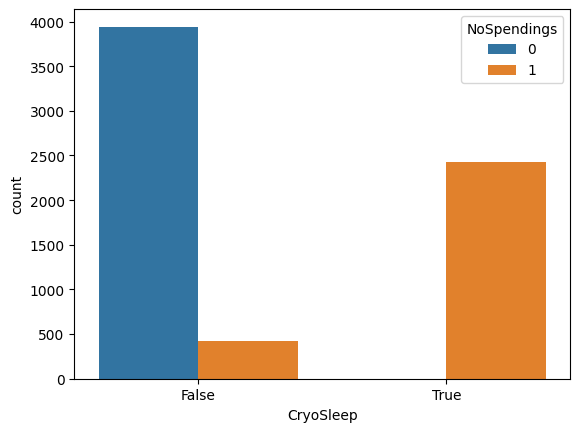

In [246]:
# Details about CryoSleep feature
print(X_train['CryoSleep'].value_counts())

sns.countplot(x='CryoSleep', hue='NoSpendings', data=X_train)
plt.show()

***

as we can infer, The passengers who are in CryoSleep had no Spendings.

**BeCareful !** if someone has True on hi's NoSpendings column we can't say that he is in CryoSleep.

In [247]:
Cryo_bef = X_train['CryoSleep'].isna().sum(), X_test['CryoSleep'].isna().sum()

# Fill missing CryoSleep values based on where NoSpendings is False
CryoFilter = X_train['CryoSleep'].isna() & (X_train['NoSpendings'] == False)
X_train.loc[CryoFilter, 'CryoSleep'] = False

CryoFilter_test = X_test['CryoSleep'].isna() & (X_test['NoSpendings'] == False)
X_test.loc[CryoFilter_test, 'CryoSleep'] = False

# Print number of missing values left
print('Train')
print('#CryoSleep missing values before:', Cryo_bef[0])
print('#CryoSleep missing values after (train):', X_train['CryoSleep'].isna().sum())
print('Test')
print('#CryoSleep missing values before:', Cryo_bef[1])
print('#CryoSleep missing values after (test):', X_test['CryoSleep'].isna().sum())

Train
#CryoSleep missing values before: 170
#CryoSleep missing values after (train): 74
Test
#CryoSleep missing values before: 47
#CryoSleep missing values after (test): 24


for the rest, Use the most common CryoSleep value.

In [248]:
cryo_mode = X_train['CryoSleep'].mode()[0]

X_train['CryoSleep'] = X_train['CryoSleep'].fillna(cryo_mode)
X_test['CryoSleep']  = X_test['CryoSleep'].fillna(cryo_mode)


C:\Users\Yuval\AppData\Local\Temp\ipykernel_4912\3561055767.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['CryoSleep'] = X_train['CryoSleep'].fillna(cryo_mode)
C:\Users\Yuval\AppData\Local\Temp\ipykernel_4912\3561055767.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['CryoSleep']  = X_test['CryoSleep'].fillna(cryo_mode)


**Expenses**

In [249]:
all_spend_nan = X_train[spending_cols].isna().all(axis=1)
print('Maximum spent by passengers in CryoSleep:',X_train.loc[X_train['CryoSleep']==True,spending_cols].sum(axis=1).max())
print("Number of passengers with all spending features missing:", all_spend_nan.sum())

Maximum spent by passengers in CryoSleep: 0.0
Number of passengers with all spending features missing: 0


Passengers is CryoSleep dont spend money.

In [250]:
# Missing values before
E_bef=X_train[spending_cols].isna().sum().sum(), X_test[spending_cols].isna().sum().sum()

# CryoSleep has no expenditure
for col in spending_cols:
    X_train.loc[(X_train[col].isna()) & (X_train['CryoSleep']==True), col]=0
    X_test.loc[(X_test[col].isna()) & (X_test['CryoSleep']==True), col]=0

# Print number of missing values left
print('Train')
print('#Expenditure missing values before:', E_bef[0])
print('#Expenditure missing values after:', X_train[spending_cols].isna().sum().sum())
print('Test')
print('#Expenditure missing values before:', E_bef[1])
print('#Expenditure missing values after:', X_test[spending_cols].isna().sum().sum())

Train
#Expenditure missing values before: 769
#Expenditure missing values after: 470
Test
#Expenditure missing values before: 174
#Expenditure missing values after: 112


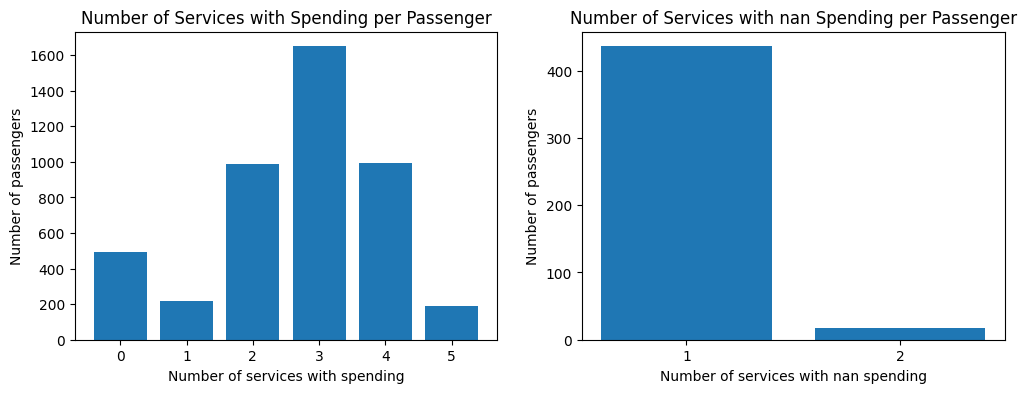

In [251]:
num_services_spent = X_train[spending_cols].gt(0).sum(axis=1)
counts = num_services_spent[X_train['CryoSleep'] == False].value_counts().sort_index()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Number of services with spending')
plt.ylabel('Number of passengers')
plt.title('Number of Services with Spending per Passenger')

num_services_spent = X_train[spending_cols].isna().sum(axis=1)
counts = num_services_spent[X_train['CryoSleep'] == False].value_counts().sort_index()
counts = counts[counts.index > 0] # We only want to look at passengers with at least one missing spending value, since the others we already know have no missing values
plt.subplot(1,2,2)
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Number of services with nan spending')
plt.ylabel('Number of passengers')
plt.xticks()
plt.title('Number of Services with nan Spending per Passenger')
plt.show()


In [252]:
X_train.groupby('Transported')[spending_cols].mean()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,
False,402.483461,372.853774,167.696988,557.462426,536.777417
True,63.698216,526.235887,187.838468,62.251728,68.331317


In [253]:
X_train[spending_cols] = X_train[spending_cols].fillna(0)
X_test[spending_cols] = X_test[spending_cols].fillna(0)

In [254]:
X_train.groupby('Transported')[spending_cols].mean()


,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,
False,394.788239,366.373117,164.490730,545.835168,527.447567
True,63.225300,521.727870,186.282981,61.718447,67.726442


In [255]:
# Update TotalSpent and NoSpendings
X_train['TotalSpent']=X_train[spending_cols].sum(axis=1)
X_test['TotalSpent']=X_test[spending_cols].sum(axis=1)
X_train['NoSpendings']=(X_train['TotalSpent']==0).astype(int)
X_test['NoSpendings']=(X_test['TotalSpent']==0).astype(int)

In [256]:
print_nulls_info(X_train)

+----------------------+-----------+------------+-----------------+
|     Column Name      | Data Type | Null Count | Null Percentage |
+----------------------+-----------+------------+-----------------+
|     PassengerId      |   object  |     0      |      0.00%      |
|      HomePlanet      |   object  |     0      |      0.00%      |
|      CryoSleep       |    bool   |     0      |      0.00%      |
|     Destination      |   object  |     0      |      0.00%      |
|         Age          |  float64  |     0      |      0.00%      |
|         VIP          |    bool   |     0      |      0.00%      |
|     RoomService      |  float64  |     0      |      0.00%      |
|      FoodCourt       |  float64  |     0      |      0.00%      |
|     ShoppingMall     |  float64  |     0      |      0.00%      |
|         Spa          |  float64  |     0      |      0.00%      |
|        VRDeck        |  float64  |     0      |      0.00%      |
|     Transported      |    bool   |     0      

## Phase 3

**Encoding & Dropping unwanted features**

In [257]:
y_train = X_train['Transported']
y_test = X_test['Transported']

# Drop features we won't use in the model
X_train.drop(['PassengerId', 'First_name', 'Last_name', 'Cabin_number', 'NoSpendings', 'Solo', 'FamilySize', 'Transported'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'First_name', 'Last_name', 'Cabin_number', 'NoSpendings', 'Solo', 'FamilySize', 'Transported'], axis=1, inplace=True)

*Explanation:*

1. **PassengerId**: identifier only. It cannot be used by models in this form and we already extracted the important parts out of it.
2. **First_name and Last_name**: Those are raw strings and the models wont be able to use those. We could one-hot encode Last_name but there are a lot of last names so this will probably create overfit.
3. **Cabin_number**: We created Cabin_region and saw it captured the information better than cabin_number.
4. **NoSpending**: It was only used for visualization, this information is already included in the spending columns.
5. **Solo**: It was used for visualization, the models will get this information through GroupSize.
6. **FamilySize**: We used it to help us impute GroupSize values, we assumed it is less stable then GroupSize because of that.

Boolean to int:
Changing CryoSleep and Transported to 0,1 instead of Boolean values.

In [258]:
X_train['CryoSleep'] = X_train['CryoSleep'].astype(int)
X_train['VIP'] = X_train['VIP'].astype(int)
y_train = y_train.astype(int)

X_test['CryoSleep'] = X_test['CryoSleep'].astype(int)
X_test['VIP'] = X_test['VIP'].astype(int)
y_test = y_test.astype(int)

OneHotEncoding HomePlanet, Destination, Cabin_deck, Cabin_side (Cabin_region is already encoded).

In [259]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns.
# Note: we do this AFTER imputations, so remaining NaNs should be handled first.
one_hot_cols = ['HomePlanet', 'Destination', 'Cabin_deck', 'Cabin_side', 'Age_group']

enc = OneHotEncoder(
    sparse_output=False,
    handle_unknown="ignore"
)

ohe_train = enc.fit_transform(X_train[one_hot_cols])
ohe_test = enc.transform(X_test[one_hot_cols])

ohe_train_df = pd.DataFrame(
    ohe_train,
    columns=enc.get_feature_names_out(one_hot_cols),
    index=X_train.index
)

ohe_test_df = pd.DataFrame(
    ohe_test,
    columns=enc.get_feature_names_out(one_hot_cols),
    index=X_test.index
)

# Replace original categorical columns with one-hot columns
X_train = X_train.drop(columns=one_hot_cols).join(ohe_train_df)
X_test = X_test.drop(columns=one_hot_cols).join(ohe_test_df)

We were'nt sure if we want to keep TotalSpent or all of the spending columns and also Age or age groups column, but we did know we cant keep all of those because the information in them is duplicated and will affect the result. Because of that we made 4 X_train with each of the combination to help us understand what will give the best results.

In [260]:
Age_group = ['Age_group_Age_0-13', 'Age_group_Age_14-18', 'Age_group_Age_19-30', 'Age_group_Age_31-50', 'Age_group_Age_51+'] # one-hot encoded age group columns

# Create different versions of the training data with different combinations of features
X_train_A = X_train.drop(columns=['TotalSpent'] + Age_group)
X_train_B = X_train.drop(columns=['TotalSpent', 'Age'])
X_train_C = X_train.drop(columns=spending_cols + Age_group)
X_train_D = X_train.drop(columns=spending_cols + ['Age'])

# Create a dictionary to store the datasets
datasets_train = {
    'SpendCols + Age': X_train_A,
    'SpendCols + AgeGroup': X_train_B,
    'TotalSpent + Age': X_train_C,
    'TotalSpent + AgeGroup': X_train_D
}

**Classifiers Imports**

In [261]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate

**Models To Examine:**

In [315]:
models = {
    "KNN": KNeighborsClassifier(n_jobs=-1 ),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "GNB": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1 ),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(n_jobs=-1 ),
    "MLP": MLPClassifier(),
    "XGBoost": GradientBoostingClassifier()
}

Now we will evaluate which of the columns we want to keep using all of the required classifiers and we will also cross-validate it.

In [316]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5) 
scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1'] 

rows = []

for ds_name, X_train_i in datasets_train.items():
    print(f"Evaluating models on dataset: {ds_name}")
    
    for model_name, model in models.items():
        scores = cross_validate(
            model,
            X_train_i,
            y_train,
            cv=cv,
            scoring=scoring,
            n_jobs=-1 # Use all available CPU cores for parallel processing
        )
        
        rows.append({ # Store mean scores for each metric
            "dataset": ds_name,
            "model": model_name,
            **{metric: scores[f"test_{metric}"].mean() for metric in scoring}
        })

results_df = pd.DataFrame(rows)

Evaluating models on dataset: SpendCols + Age
Evaluating models on dataset: SpendCols + AgeGroup
Evaluating models on dataset: TotalSpent + Age
Evaluating models on dataset: TotalSpent + AgeGroup


In [317]:
pivot_metric = results_df.pivot(
    index='dataset',
    columns='model',
    values="roc_auc"
)

print(f"\nROC AUC:\n")
print(pivot_metric.round(3))



ROC AUC:

model                  Decision Tree    GNB    KNN    LDA  \
dataset                                                     
SpendCols + Age                0.739  0.853  0.806  0.860   
SpendCols + AgeGroup           0.735  0.850  0.811  0.861   
TotalSpent + Age               0.678  0.752  0.719  0.790   
TotalSpent + AgeGroup          0.680  0.755  0.724  0.793   

model                  Logistic Regression    MLP    QDA  Random Forest  \
dataset                                                                   
SpendCols + Age                      0.861  0.838  0.866          0.878   
SpendCols + AgeGroup                 0.876  0.836  0.866          0.870   
TotalSpent + Age                     0.788  0.730  0.767          0.798   
TotalSpent + AgeGroup                0.791  0.735  0.775          0.788   

model                    SVM  XGBoost  
dataset                                
SpendCols + Age        0.839    0.894  
SpendCols + AgeGroup   0.840    0.893  
TotalSpent 

Now we can see that we get the best roc_auc results by using Age and the spending columns instead of age_group and totalSpendings.

We also got a clue that XGBoost is the best classifier, we will continue testing using different hyperparameter.

In [351]:
from sklearn.metrics import *


In [ ]:
plt.figure()

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc_value = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_value:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Comparison")
plt.legend()
plt.show()


In [344]:
ds = "SpendCols + Age"
df1 = results_df[results_df["dataset"] == ds]

metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]

for m in metrics:
    best_row = df1.loc[df1[m].idxmax()]
    print(f"Best classifier by {m}: {best_row['model']} ({best_row[m]:.3f})")

print("\n")
for m in metrics:
    worst_row = df1.loc[df1[m].idxmin()]
    print(f"Worst classifier by {m}: {worst_row['model']} ({worst_row[m]:.3f})")

print("\n")
df1 = df1.drop(columns=["dataset"]).set_index("model").round(3)
print(df1.sort_values("f1", ascending=False))

Best classifier by accuracy: XGBoost (0.802)
Best classifier by precision: Random Forest (0.826)
Best classifier by recall: QDA (0.914)
Best classifier by f1: XGBoost (0.808)
Best classifier by roc_auc: XGBoost (0.894)


Worst classifier by accuracy: QDA (0.710)
Worst classifier by precision: QDA (0.661)
Worst classifier by recall: LDA (0.730)
Worst classifier by f1: Decision Tree (0.743)
Worst classifier by roc_auc: Decision Tree (0.739)


                     accuracy  precision  recall  roc_auc     f1
model                                                           
XGBoost                 0.802      0.789   0.828    0.894  0.808
Logistic Regression     0.786      0.747   0.871    0.861  0.804
SVM                     0.777      0.727   0.893    0.839  0.801
Random Forest           0.794      0.826   0.749    0.878  0.785
GNB                     0.750      0.697   0.892    0.853  0.782
KNN                     0.760      0.742   0.801    0.806  0.770
LDA                     0.777      

Conclusion from the tables above:
* QDA maximizes recall, its very low precision indicates poor discrimination ability and excessive positive predictions, making it less suitable as a final classifier.
* XGBoost shows the best accuracy, F1-score, and ROC AUC, indicating strong and balanced overall performance. It appears to be the best candidate.

We therefore decided to further evaluate only classifiers with F1 > 0.8:
XGBoost, Logistic Regression, and SVM.

In the next 3 cells we made a "checkpoint" so we wont have to run the entire notebook.

In [284]:
# Dropping the features we found were less useful
X_train.drop(columns=(['TotalSpent'] + Age_group), inplace=True)
X_test.drop(columns=(['TotalSpent'] + Age_group), inplace=True)

In [285]:
# save processed data to csv 
X_train.to_csv('X_train_processed.csv', index=False)
X_test.to_csv('X_test_processed.csv', index=False)

In [93]:
X_train = pd.read_csv('X_train_processed.csv')
X_test = pd.read_csv('X_test_processed.csv')

#### Models Optimization
In the next part we will try and maximize the performance of each of the classifiers and by the end of it we will find the best classifier for this data.


In [ ]:
# Setting scoring method and cross-validation strategy for future model evaluations
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

from sklearn.model_selection import GridSearchCV

**KNN**

In [ ]:
# Optimizing KNN model using GridSearchCV
knn = KNeighborsClassifier(n_jobs=-1)
param_grid_knn = {
    'n_neighbors': list(range(1, 121)),
    'weights': ['uniform', 'distance']
}

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
clf_knn_roc_auc = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=cv,
    n_jobs=-1,
    scoring=scoring,
    refit='roc_auc'
)

clf_knn_roc_auc.fit(X_train, y_train)

results_df_knn_roc_auc = pd.DataFrame(clf_knn_roc_auc.cv_results_)
results_df_knn_roc_auc = results_df_knn_roc_auc.sort_values('mean_test_roc_auc', ascending=False)
print(results_df_knn_roc_auc[['param_n_neighbors', 'param_weights', 'mean_test_accuracy',
                      'mean_test_precision', 'mean_test_recall', 
                      'mean_test_f1', 'mean_test_roc_auc']].head(10))


    param_n_neighbors param_weights  mean_test_accuracy  mean_test_precision  \
63                 32      distance            0.772994             0.743304   
61                 31      distance            0.773253             0.743991   
57                 29      distance            0.773843             0.745092   
59                 30      distance            0.773527             0.744454   
55                 28      distance            0.773972             0.745441   
53                 27      distance            0.774289             0.746213   
49                 25      distance            0.774130             0.746700   
65                 33      distance            0.773052             0.743197   
51                 26      distance            0.774174             0.746437   
67                 34      distance            0.772347             0.742041   

    mean_test_recall  mean_test_f1  mean_test_roc_auc  
63          0.839208      0.788276           0.833377  
61     

In [ ]:
clf_knn_f1 = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=cv,
    n_jobs=-1,
    scoring=scoring,
    refit='f1'
)

clf_knn_f1.fit(X_train, y_train)

results_df_knn_f1 = pd.DataFrame(clf_knn_f1.cv_results_)
results_df_knn_f1 = results_df_knn_f1.sort_values('mean_test_f1', ascending=False)
print(results_df_knn_f1[['param_n_neighbors', 'param_weights', 'mean_test_accuracy',
                      'mean_test_precision', 'mean_test_recall', 
                      'mean_test_f1', 'mean_test_roc_auc']].head(10))


    param_n_neighbors param_weights  mean_test_accuracy  mean_test_precision  \
40                 21       uniform            0.776331             0.745352   
44                 23       uniform            0.775985             0.744521   
48                 25       uniform            0.775741             0.743843   
52                 27       uniform            0.775094             0.742986   
36                 19       uniform            0.776072             0.745875   
42                 22       uniform            0.777984             0.752110   
56                 29       uniform            0.774533             0.742099   
46                 24       uniform            0.777265             0.750520   
54                 28       uniform            0.776244             0.748096   
50                 26       uniform            0.776733             0.749553   

    mean_test_recall  mean_test_f1  mean_test_roc_auc  
40          0.844577      0.791799           0.832107  
44     

In [ ]:
# Saving best KNN model and its results for later analysis and comparison with other models
KNN_best = clf_knn_roc_auc.best_estimator_
KNN_best_params = clf_knn_roc_auc.best_params_
KNN_best_results = clf_knn_roc_auc.cv_results_

**QDA**

In [385]:
# Optimizing QDA model using GridSearchCV
qda = QuadraticDiscriminantAnalysis()

param_grid_qda = {"reg_param": [0.0, 0.01, 0.05, 0.1, 0.15, 0.5, 1.0]}
clf_qda_roc_auc = GridSearchCV(
    estimator=qda,
    param_grid=param_grid_qda,
    cv=cv,
    n_jobs=-1,
    scoring=scoring,
    refit='roc_auc'
)

clf_qda_roc_auc.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=QuadraticDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'reg_param': [0.0, 0.01, 0.05, 0.1, 0.15, 0.5, 1.0]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [386]:
results_df_qda_roc_auc = pd.DataFrame(clf_qda_roc_auc.cv_results_)
results_df_qda_roc_auc = results_df_qda_roc_auc.sort_values('mean_test_roc_auc', ascending=False)
print(results_df_qda_roc_auc[['param_reg_param', 'mean_test_accuracy',
                      'mean_test_precision', 'mean_test_recall', 
                      'mean_test_f1', 'mean_test_roc_auc']])

   param_reg_param  mean_test_accuracy  mean_test_precision  mean_test_recall  \
3             0.10            0.744247             0.681001          0.926098   
4             0.15            0.740293             0.677029          0.926355   
2             0.05            0.751552             0.690243          0.919502   
1             0.01            0.759821             0.709612          0.886065   
0             0.00            0.707060             0.657633          0.913226   
5             0.50            0.750704             0.691904          0.910535   
6             1.00            0.663991             0.640069          0.758570   

   mean_test_f1  mean_test_roc_auc  
3      0.784828           0.879027  
4      0.782274           0.878338  
2      0.788507           0.878314  
1      0.787977           0.872046  
0      0.761050           0.865770  
5      0.786272           0.861127  
6      0.693833           0.723104  


In [389]:
param_grid_qda = {"reg_param": [0.0, 0.01, 0.05, 0.1, 0.15, 0.5, 1.0]}
clf_qda_f1 = GridSearchCV(
    estimator=qda,
    param_grid=param_grid_qda,
    cv=cv,
    n_jobs=-1,
    scoring=scoring,
    refit='f1'
)

clf_qda_f1.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=QuadraticDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'reg_param': [0.0, 0.01, 0.05, 0.1, 0.15, 0.5, 1.0]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [391]:
results_df_qda_f1 = pd.DataFrame(clf_qda_f1.cv_results_)
results_df_qda_f1 = results_df_qda_f1.sort_values('mean_test_f1', ascending=False)
print(results_df_qda_f1[['param_reg_param', 'mean_test_accuracy',
                      'mean_test_precision', 'mean_test_recall', 
                      'mean_test_f1', 'mean_test_roc_auc']])

   param_reg_param  mean_test_accuracy  mean_test_precision  mean_test_recall  \
2             0.05            0.751395             0.690173          0.919505   
1             0.01            0.759793             0.709238          0.887151   
5             0.50            0.750474             0.691796          0.910280   
3             0.10            0.743586             0.680446          0.926072   
4             0.15            0.740006             0.676850          0.926330   
0             0.00            0.708920             0.659943          0.911361   
6             1.00            0.663590             0.638441          0.762326   

   mean_test_f1  mean_test_roc_auc  
2      0.788428           0.878217  
1      0.788181           0.871955  
5      0.786084           0.861466  
3      0.784418           0.878990  
4      0.782111           0.878338  
0      0.761875           0.865366  
6      0.693760           0.723348  


In [392]:
# Saving best QDA model and its results for later analysis and comparison with other models
QDA_best = clf_qda_roc_auc.best_estimator_
QDA_best_params = clf_qda_roc_auc.best_params_
QDA_best_results = clf_qda_roc_auc.cv_results_

**LDA**

In [393]:
lda = LinearDiscriminantAnalysis()
param_grid_lda = [
    {
        'solver': ['svd']
    },
    {
        'solver': ['lsqr', 'eigen'],
        'shrinkage': [None, 'auto', 0.1, 0.3, 0.5, 0.7, 0.9]
    }  
]

clf_lda_roc_auc = GridSearchCV(
    estimator=lda,
    param_grid=param_grid_lda,
    cv=cv,
    n_jobs=-1,
    scoring=scoring,
    refit='roc_auc'
)

clf_lda_roc_auc.fit(X_train, y_train)

c:\Users\Yuval\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yuval\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yuval\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yuval\AppDa

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid=[{'solver': ['svd']},
                         {'shrinkage': [None, 'auto', 0.1, 0.3, 0.5, 0.7, 0.9],
                          'solver': ['lsqr', 'eigen']}],
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [395]:
results_df_lda_roc_auc = pd.DataFrame(clf_lda_roc_auc.cv_results_)
results_df_lda_roc_auc = results_df_lda_roc_auc.sort_values('mean_test_roc_auc', ascending=False)
print(results_df_lda_roc_auc[['param_solver', 'param_shrinkage', 'mean_test_accuracy',
                      'mean_test_precision', 'mean_test_recall', 
                      'mean_test_f1', 'mean_test_roc_auc']].head(10))

   param_solver param_shrinkage  mean_test_accuracy  mean_test_precision  \
0           svd             NaN            0.776402             0.808714   
1          lsqr            None            0.776402             0.808714   
3          lsqr            auto            0.775913             0.808560   
4         eigen            auto            0.775913             0.808560   
7          lsqr             0.3            0.727682             0.663663   
8         eigen             0.3            0.727682             0.663663   
5          lsqr             0.1            0.725151             0.661273   
6         eigen             0.1            0.725151             0.661273   
9          lsqr             0.5            0.729522             0.665189   
10        eigen             0.5            0.729522             0.665189   

    mean_test_recall  mean_test_f1  mean_test_roc_auc  
0           0.728358      0.766369           0.859783  
1           0.728358      0.766369           0.8597

In [396]:
clf_lda_f1 = GridSearchCV(
    estimator=lda,
    param_grid=param_grid_lda,
    cv=cv,
    n_jobs=-1,
    scoring=scoring,
    refit='f1'
)

clf_lda_f1.fit(X_train, y_train)

c:\Users\Yuval\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yuval\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yuval\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yuval\AppDa

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid=[{'solver': ['svd']},
                         {'shrinkage': [None, 'auto', 0.1, 0.3, 0.5, 0.7, 0.9],
                          'solver': ['lsqr', 'eigen']}],
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [397]:
results_df_lda_f1 = pd.DataFrame(clf_lda_f1.cv_results_)
results_df_lda_f1 = results_df_lda_f1.sort_values('mean_test_f1', ascending=False)
print(results_df_lda_f1[['param_solver', 'param_shrinkage', 'mean_test_accuracy',
                      'mean_test_precision', 'mean_test_recall', 
                      'mean_test_f1', 'mean_test_roc_auc']].head(10))

   param_solver param_shrinkage  mean_test_accuracy  mean_test_precision  \
9          lsqr             0.5            0.729537             0.665247   
10        eigen             0.5            0.729537             0.665247   
11         lsqr             0.7            0.728616             0.664197   
12        eigen             0.7            0.728616             0.664197   
7          lsqr             0.3            0.727897             0.663941   
8         eigen             0.3            0.727897             0.663941   
5          lsqr             0.1            0.725136             0.661311   
6         eigen             0.1            0.725136             0.661311   
0           svd             NaN            0.776272             0.808622   
1          lsqr            None            0.776272             0.808622   

    mean_test_recall  mean_test_f1  mean_test_roc_auc  
9           0.932523      0.776466           0.806270  
10          0.932523      0.776466           0.8062

# ירין פה עצרתי בערך

**Testing Hyperparametes**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Building model with hyperparameter tuning
estimatiors = {
    "KNN": (
        KNeighborsClassifier(),
        {
            'n_neighbors': list(range(1, 121)),
            'n_jobs': [-1] # Use all available CPU cores for parallel processing
        }
    ),
    "LDA": (
        LinearDiscriminantAnalysis(),
        {
           
        }
    ),
    "QDA": (
        QuadraticDiscriminantAnalysis(),
        {
            
        }
    ),
    "GNB": (
        GaussianNB(),
        {
            
        }
    ),
    "Decision Tree": (
        DecisionTreeClassifier(),
        {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': list(range(1, 20)),
            'min_samples_leaf': list(range(1, 20))
        }
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {
            'n_estimators': [100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': list(range(2, 10)),
            'min_samples_leaf': list(range(1, 10)),
            'n_jobs': [-1] # Use all available CPU cores for parallel processing
        }
    ),
    "SVM": (
        SVC(),
        {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    ),
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    ),
    "MLP": (
        MLPClassifier(max_iter=1000),
        {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'sgd']
        }
    ),
    "XGBoost": (
        GradientBoostingClassifier(),
        {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    )
}


KNN
Best ROC AUC (CV): 0.8325
Best params: {'n_jobs': -1, 'n_neighbors': 23}

LDA
Best ROC AUC (CV): 0.8596
Best params: {}

QDA
Best ROC AUC (CV): 0.8665
Best params: {}


c:\Users\Yuval\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



GNB
Best ROC AUC (CV): 0.8529
Best params: {}


c:\Users\Yuval\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
380 fits failed out of a total of 7220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
380 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yuval\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yuval\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Yuval\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Yuval\anaconda3\Lib\site-packa


Decision Tree
Best ROC AUC (CV): 0.8647
Best params: {'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 14}

Random Forest
Best ROC AUC (CV): 0.8888
Best params: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 200, 'n_jobs': -1}

SVM
Best ROC AUC (CV): 0.8832
Best params: {'C': 0.1, 'kernel': 'linear'}

Logistic Regression
Best ROC AUC (CV): 0.8844
Best params: {'C': 0.1, 'solver': 'liblinear'}

MLP
Best ROC AUC (CV): 0.8447
Best params: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'adam'}

XGBoost
Best ROC AUC (CV): 0.8958
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Selected best tuned model: XGBoost

Classification report (test):
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       863
           1       0.79      0.83      0.81       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80    

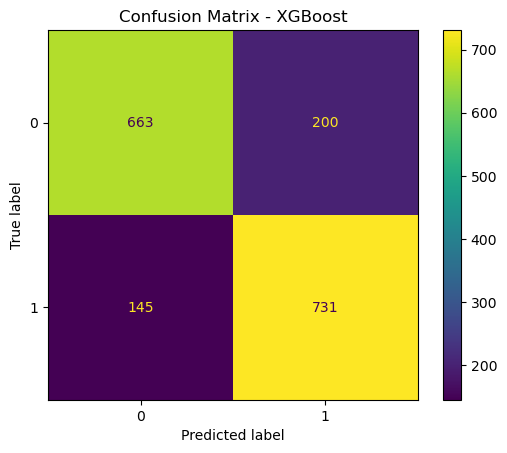

In [93]:
best_models = {}
for name, (estimator, param_grid) in estimatiors.items():
    gs = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring="roc_auc",
        cv=5,
        n_jobs=-1
    )
    gs.fit(X_train, y_train)
    best_models[name] = gs

    print(f"\n{name}")
    print("Best ROC AUC (CV):", round(gs.best_score_, 4))
    print("Best params:", gs.best_params_)

# Pick the single best tuned model by CV ROC AUC
best_name = max(best_models, key=lambda k: best_models[k].best_score_)
best_estimator = best_models[best_name].best_estimator_
print("\nSelected best tuned model:", best_name)

# Final evaluation on the held-out test set
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict(X_test)

print("\nClassification report (test):")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f"Confusion Matrix - {best_name}")
plt.show()


In [ ]:
import joblib
from pathlib import Path

# Save best estimators
Path("saved_models").mkdir(exist_ok=True)
for name, gs in best_models.items():
    joblib.dump(
        gs.best_estimator_,
        f"saved_models/{name}_best_estimator.joblib"
    )

# Save full grid search objects (including CV results)
Path("saved_grids").mkdir(exist_ok=True)
for name, gs in best_models.items():
    joblib.dump(gs, f"saved_grids/{name}_gridsearch.joblib")

In [ ]:
loaded_models = {}
for path in Path("saved_models").glob("*_best_estimator.joblib"):
    name = path.stem.replace("_best_estimator", "")
    loaded_models[name] = joblib.load(path)

loaded_grids = {}
for path in Path("saved_grids").glob("*_gridsearch.joblib"):
    name = path.stem.replace("_gridsearch", "")
    loaded_grids[name] = joblib.load(path)

0.8957891988678123

In [99]:
import numpy as np

def get_scores(est, X):
    if hasattr(est, "predict_proba"):
        return est.predict_proba(X)[:, 1]
    if hasattr(est, "decision_function"):
        return est.decision_function(X)
    return est.predict(X)

def eval_all_models(models_dict, X):
    preds, scores = {}, {}
    for name, est in models_dict.items():
        preds[name] = est.predict(X)
        scores[name] = get_scores(est, X)
    return preds, scores


In [100]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

test_preds, test_scores = eval_all_models(loaded_models, X_test)

rows = []
for name in loaded_models.keys():
    rows.append({
        "model": name,
        "roc_auc": roc_auc_score(y_test, test_scores[name]),
        "accuracy": accuracy_score(y_test, test_preds[name]),
        "precision": precision_score(y_test, test_preds[name], zero_division=0),
        "recall": recall_score(y_test, test_preds[name], zero_division=0),
        "f1": f1_score(y_test, test_preds[name], zero_division=0),
    })

metrics_df = pd.DataFrame(rows).sort_values("roc_auc", ascending=False).reset_index(drop=True).round(4)
metrics_df


,model,roc_auc,accuracy,precision,recall,f1
0,XGBoost,0.8970,0.8016,0.7852,0.8345,0.8091
1,Random Forest,0.8961,0.8097,0.8248,0.7900,0.8070
2,SVM,0.8844,0.7878,0.7688,0.8276,0.7971
3,Logistic Regression,0.8843,0.7913,0.7737,0.8276,0.7998
4,Decision Tree,0.8667,0.7757,0.8092,0.7260,0.7653
5,QDA,0.8640,0.7274,0.6706,0.9018,0.7692
6,LDA,0.8593,0.7717,0.8043,0.7226,0.7613
7,MLP,0.8562,0.7148,0.8696,0.5103,0.6432
8,GNB,0.8461,0.7372,0.6849,0.8858,0.7725
9,KNN,0.8214,0.7660,0.7362,0.8345,0.7822


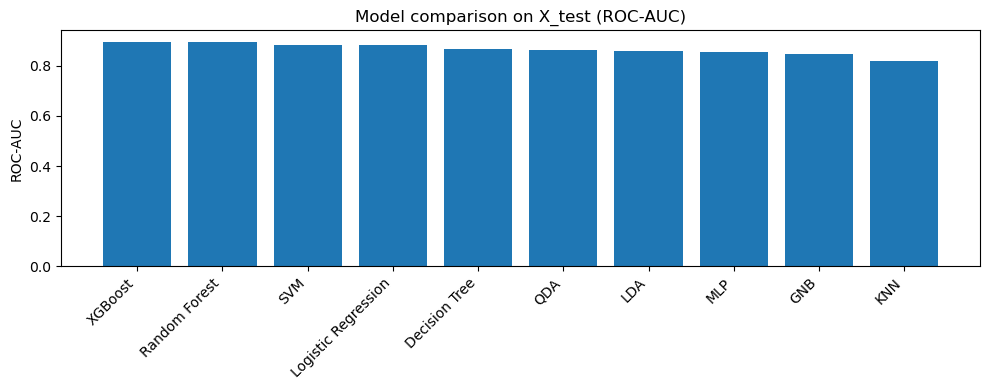

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.bar(metrics_df["model"], metrics_df["roc_auc"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("ROC-AUC")
plt.title("Model comparison on X_test (ROC-AUC)")
plt.tight_layout()
plt.show()


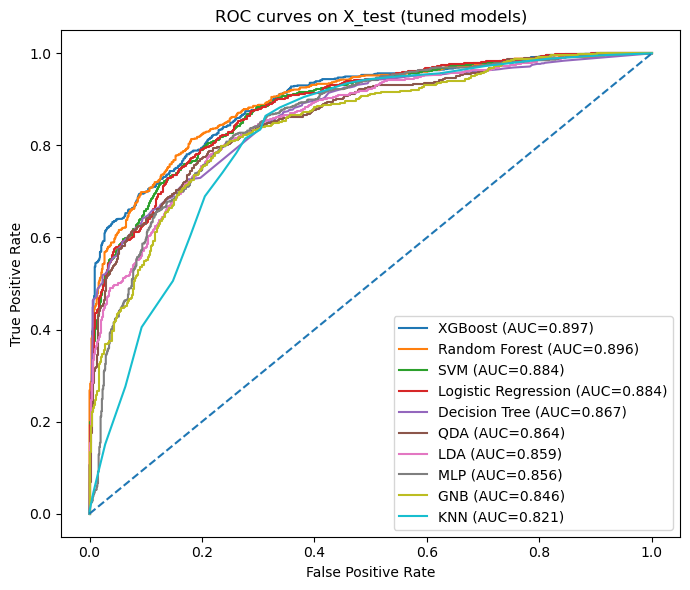

In [102]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(7, 6))

for name in metrics_df["model"]:
    fpr, tpr, _ = roc_curve(y_test, test_scores[name])
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr, tpr):.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves on X_test (tuned models)")
plt.legend()
plt.tight_layout()
plt.show()


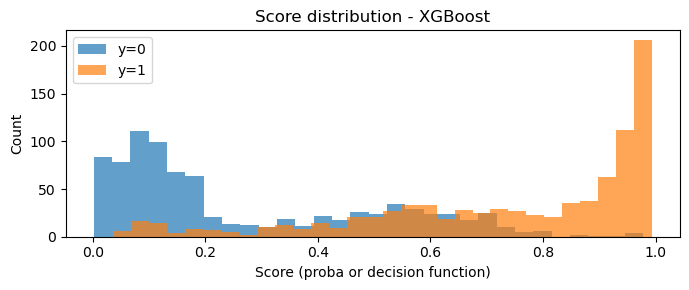

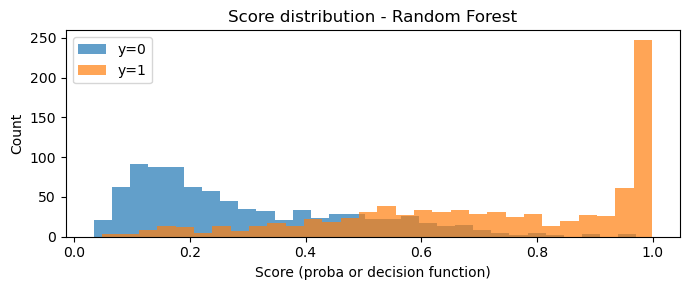

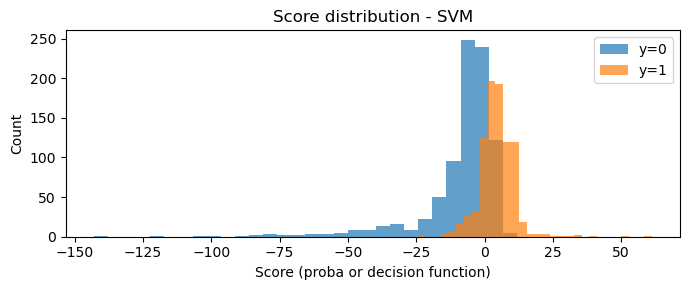

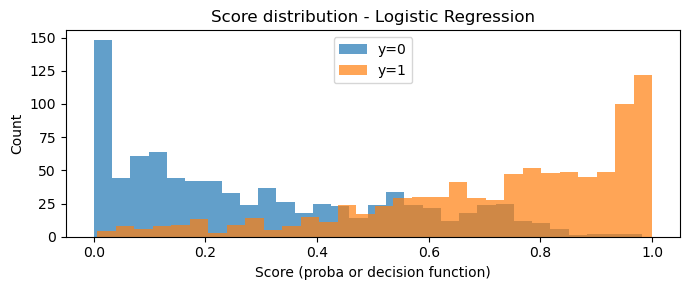

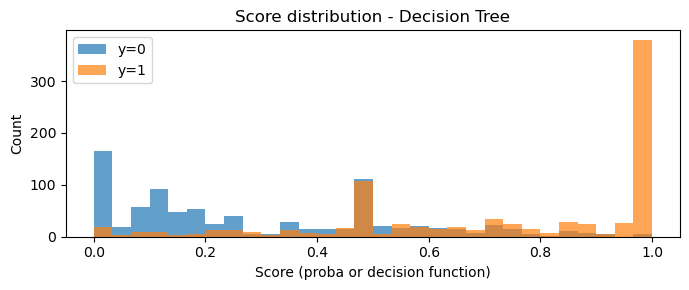

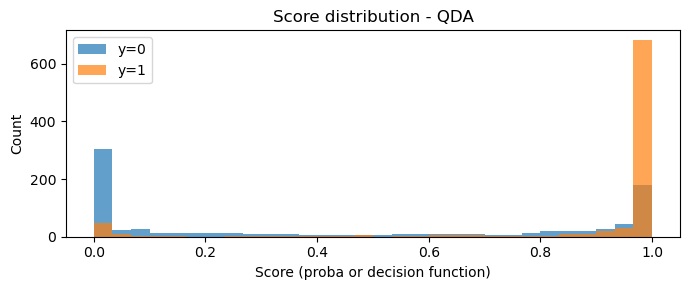

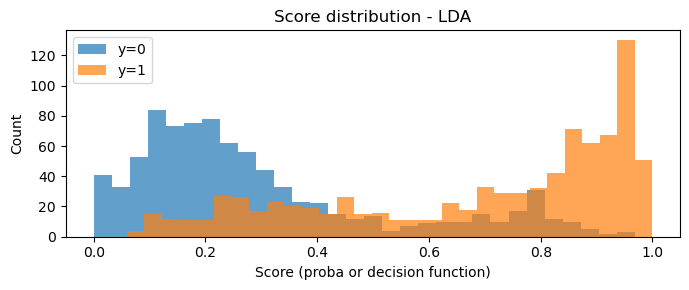

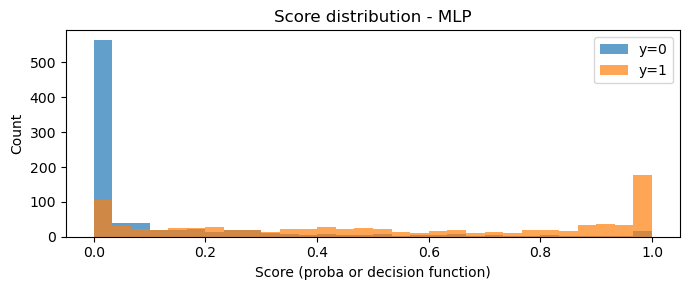

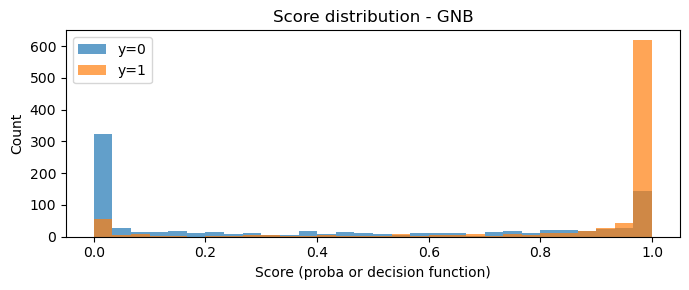

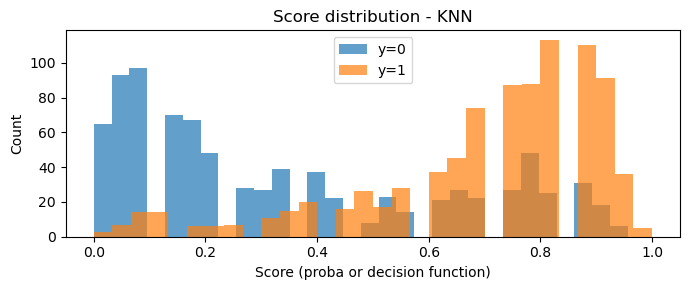

In [103]:
for name in metrics_df["model"]:
    scores = test_scores[name]
    plt.figure(figsize=(7, 3))
    plt.hist(scores[y_test == 0], bins=30, alpha=0.7, label="y=0")
    plt.hist(scores[y_test == 1], bins=30, alpha=0.7, label="y=1")
    plt.title(f"Score distribution - {name}")
    plt.xlabel("Score (proba or decision function)")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()


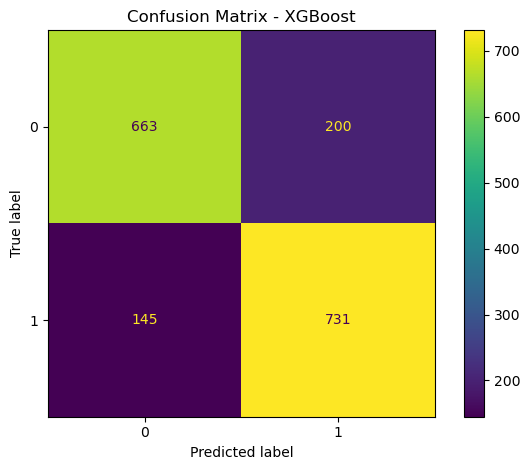

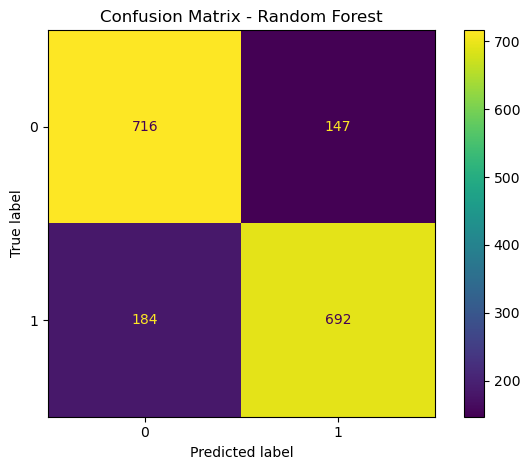

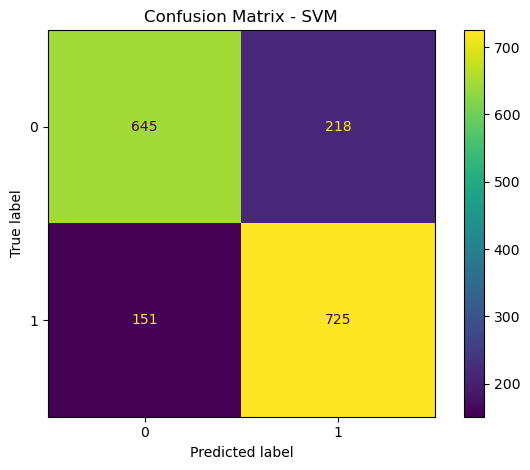

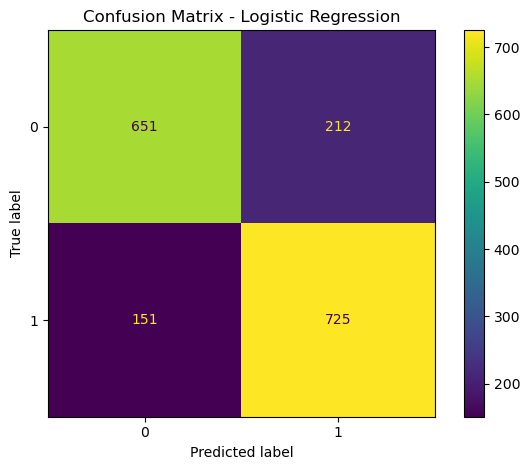

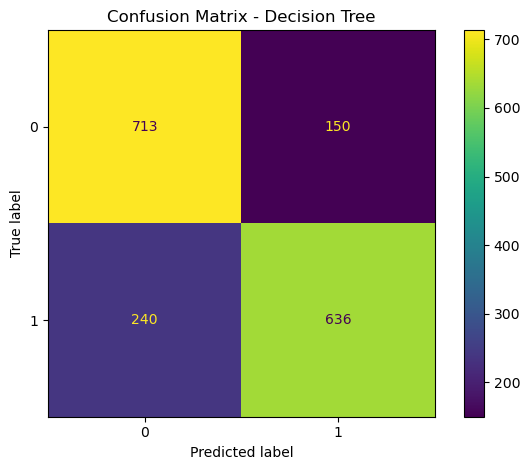

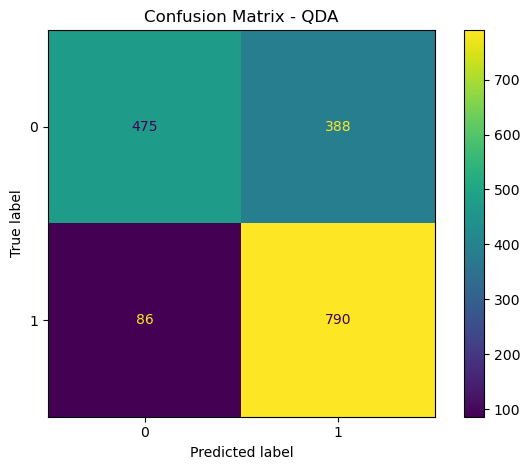

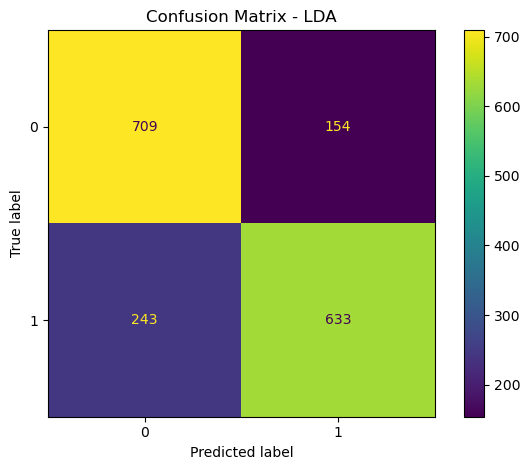

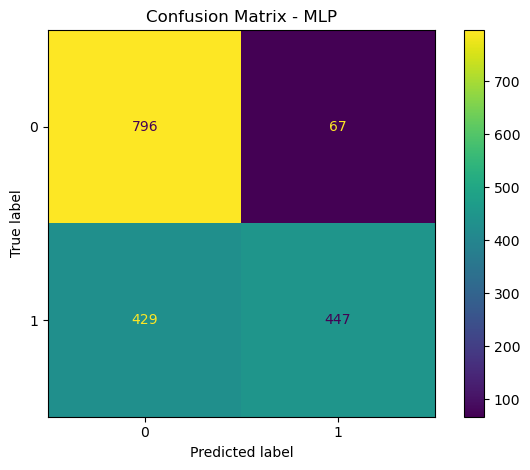

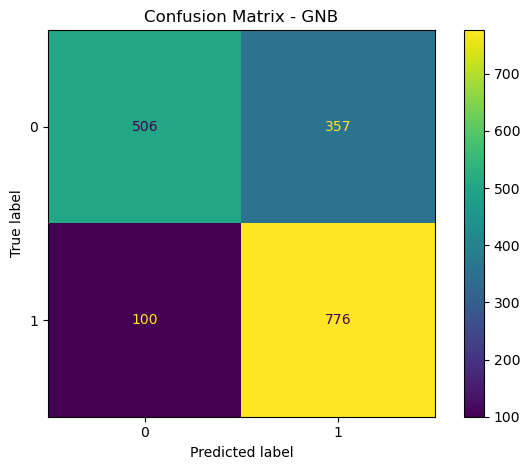

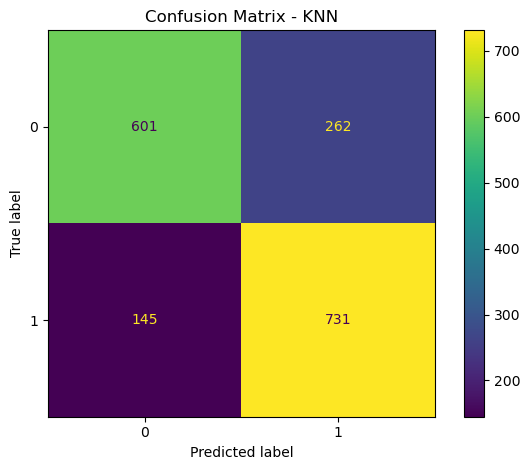

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name in metrics_df["model"]:
    cm = confusion_matrix(y_test, test_preds[name])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()
